In [2]:
import numpy as np 
import seaborn as sns
from NNetwork import NNetwork as nn
from src.sampling.Sampling import sampling_SNLD
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_reg
from util.plotting import *


In [3]:
def affinity_score_cal(graph_list, G_test_path, sample_size_list, k, n_components, iterations):
    # SNDL
    X, y = sampling_SNLD(graph_list, k=k, sample_size_list=sample_size_list)
    W, beta, H = sndl_equalEdge(graph_list, sample_size_1=sample_size_list[0], sample_size_2=sample_size_list[1], k=k, xi=2, n_components=n_components, iter=iterations)
    
    # Load new network
    G_test = nn.NNetwork()
    G_test.load_add_edges(G_test_path, increment_weights=False, use_genfromtxt=True)

    # Evaluate regression
    affinity = sndl_reg(G_test, W, beta, 1000)
    return affinity


In [3]:
def affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations):
    graph_paths = []
    graph_list = []
    for ntwk in ntwk_list:
        path = "data/" + str(ntwk) + '.txt'
        graph_paths.append(path)
        G = nn.NNetwork()
        G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
        graph_list.append(G)

    assert len(graph_paths) == len(graph_list)
    
    num_graphs = len(graph_list)
    affinity_matrix = np.zeros((num_graphs * (num_graphs - 1), num_graphs))
    
    row_labels = []
    idx = 0
    
    for i in range(num_graphs):
        for j in range(num_graphs):
            if i != j:
                row_labels.append(f'{ntwk_list[i]} & {ntwk_list[j]}')
                for l in range(num_graphs):
                    print(f"Iteration: {i, j, l}")
                    G_test = graph_paths[l]
                    affinity_score = affinity_score_cal([graph_list[i], graph_list[j]], G_test, sample_size_list, k, n_components, iterations)
                    affinity_matrix[idx, l] = affinity_score
                idx += 1

    col_labels = [ntwk for ntwk in ntwk_list]

    plt.figure(figsize=(10, 8))
    sns.heatmap(affinity_matrix, annot=True, fmt=".2f", xticklabels=col_labels, yticklabels=row_labels, cmap='Blues')
    plt.xlabel('Test Network')
    plt.ylabel('Network Pair')
    plt.title('Affinity Scores Heatmap')
    plt.show()


Iteration: (0, 1, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2272.0
1748.0
initial loading beta [[ 0.97378934 -0.33454889  0.01923121  0.95060618 -0.33466724 -0.7449227
  -0.03019108 -0.64573365  0.03222788 -0.53380969 -0.100065    0.74300313
  -0.50489228  0.24003155 -0.64333842  0.93823393 -0.94231392]]


  1%|          | 1/125 [00:00<01:00,  2.06it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.817]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1840.191864.3, 137.923806.3, 3818.307534.3]
--- Training --- [threshold, AUC] =  [0.644, 0.813]
--- Iteration 10: Training loss --- [Data, Label, Total] = [479.163869.3, 137.251525.3, 1095.579262.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:07, 15.89it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.644, 0.813, 0.756, 0.719]
--- Training --- [threshold, AUC] =  [0.644, 0.817]
--- Iteration 20: Training loss --- [Data, Label, Total] = [286.331043.3, 135.876114.3, 708.538201.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:01<00:04, 24.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.644, 0.817, 0.76, 0.722]
--- Training --- [threshold, AUC] =  [0.487, 0.819]
--- Iteration 30: Training loss --- [Data, Label, Total] = [198.781131.3, 135.753440.3, 533.315703.3]
!!! pred_type filter


 31%|███       | 39/125 [00:01<00:02, 38.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.487, 0.819, 0.76, 0.779]
--- Training --- [threshold, AUC] =  [0.528, 0.82]
--- Iteration 40: Training loss --- [Data, Label, Total] = [151.494086.3, 135.915220.3, 438.903391.3]
!!! pred_type filter


 36%|███▌      | 45/125 [00:01<00:02, 36.04it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.82, 0.76, 0.773]
--- Training --- [threshold, AUC] =  [0.527, 0.822]
--- Iteration 50: Training loss --- [Data, Label, Total] = [123.430298.3, 136.100978.3, 382.961574.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 39.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.527, 0.822, 0.764, 0.776]
--- Training --- [threshold, AUC] =  [0.526, 0.822]
--- Iteration 60: Training loss --- [Data, Label, Total] = [106.685943.3, 136.307387.3, 349.679274.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.822, 0.764, 0.776]


 57%|█████▋    | 71/125 [00:02<00:01, 41.29it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [95.209020.3, 136.514691.3, 326.932732.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.823, 0.768, 0.78]


 65%|██████▍   | 81/125 [00:02<00:00, 44.79it/s]

--- Training --- [threshold, AUC] =  [0.524, 0.823]
--- Iteration 80: Training loss --- [Data, Label, Total] = [86.571355.3, 136.703181.3, 309.845890.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.823, 0.764, 0.777]


 73%|███████▎  | 91/125 [00:02<00:00, 46.70it/s]

--- Training --- [threshold, AUC] =  [0.531, 0.821]
--- Iteration 90: Training loss --- [Data, Label, Total] = [80.125441.3, 136.853584.3, 297.104466.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.531, 0.821, 0.756, 0.743]
--- Training --- [threshold, AUC] =  [0.533, 0.821]
--- Iteration 100: Training loss --- [Data, Label, Total] = [75.731501.3, 136.967396.3, 288.430399.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 51.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.821, 0.756, 0.743]
--- Training --- [threshold, AUC] =  [0.534, 0.821]
--- Iteration 110: Training loss --- [Data, Label, Total] = [72.850644.3, 137.038731.3, 282.740020.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.534, 0.821, 0.756, 0.743]


100%|██████████| 125/125 [00:03<00:00, 39.87it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.822]
--- Iteration 120: Training loss --- [Data, Label, Total] = [70.923790.3, 137.072387.3, 278.919967.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.822, 0.76, 0.778]
!!! pred_type filter


Iteration: (0, 1, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2358.0
1828.0
initial loading beta [[-0.60942486  0.07204502  0.86919972 -0.87311016  0.63897267  0.46068793
  -0.07283585  0.30034634 -0.64999173  0.16450024 -0.48343051 -0.24368777
   0.30930816 -0.36682237  0.07547355  0.57074169  0.16940899]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.542, 0.807]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1986.015307.3, 142.200687.3, 4114.231300.3]
--- Training --- [threshold, AUC] =  [0.625, 0.815]
--- Iteration 10: Training loss --- [Data, Label, Total] = [490.845855.3, 140.908933.3, 1122.600643.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 52.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.815, 0.764, 0.731]
--- Training --- [threshold, AUC] =  [0.61, 0.818]
--- Iteration 20: Training loss --- [Data, Label, Total] = [312.170211.3, 139.931772.3, 764.272193.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.61, 0.818, 0.768, 0.741]
--- Training --- [threshold, AUC] =  [0.556, 0.819]
--- Iteration 30: Training loss --- [Data, Label, Total] = [228.734683.3, 139.699879.3, 597.169245.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 48.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.819, 0.768, 0.772]
--- Training --- [threshold, AUC] =  [0.533, 0.821]
--- Iteration 40: Training loss --- [Data, Label, Total] = [192.519450.3, 139.719022.3, 524.757922.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.533, 0.821, 0.768, 0.779]


 41%|████      | 51/125 [00:01<00:01, 47.59it/s]

--- Training --- [threshold, AUC] =  [0.546, 0.821]
--- Iteration 50: Training loss --- [Data, Label, Total] = [175.965049.3, 139.834846.3, 491.764944.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.546, 0.821, 0.768, 0.777]
--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 60: Training loss --- [Data, Label, Total] = [164.506535.3, 139.955311.3, 468.968381.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 48.11it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.772, 0.769]
--- Training --- [threshold, AUC] =  [0.554, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [154.891454.3, 140.023249.3, 449.806156.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.554, 0.823, 0.772, 0.765]


 65%|██████▍   | 81/125 [00:01<00:00, 47.47it/s]

--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 80: Training loss --- [Data, Label, Total] = [146.593349.3, 140.049021.3, 433.235720.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.776, 0.772]


 73%|███████▎  | 91/125 [00:01<00:00, 46.83it/s]

--- Training --- [threshold, AUC] =  [0.549, 0.822]
--- Iteration 90: Training loss --- [Data, Label, Total] = [138.947588.3, 140.047758.3, 417.942934.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.549, 0.822, 0.776, 0.772]


 81%|████████  | 101/125 [00:02<00:00, 44.65it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 100: Training loss --- [Data, Label, Total] = [130.771738.3, 140.038249.3, 401.581724.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.823, 0.776, 0.772]


 89%|████████▉ | 111/125 [00:02<00:00, 45.13it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 110: Training loss --- [Data, Label, Total] = [122.690845.3, 140.028169.3, 385.409859.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.823, 0.776, 0.772]


100%|██████████| 125/125 [00:02<00:00, 47.74it/s]

--- Training --- [threshold, AUC] =  [0.551, 0.823]
--- Iteration 120: Training loss --- [Data, Label, Total] = [116.506805.3, 140.041772.3, 373.055381.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.551, 0.823, 0.776, 0.772]
!!! pred_type filter


Iteration: (0, 1, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2282.0
1786.0
initial loading beta [[ 0.13749951  0.39566405 -0.23646907  0.37820377  0.29976294  0.8369452
  -0.90189843 -0.98283122  0.57490749  0.54823575  0.05375197 -0.02967396
  -0.46702099 -0.45986977 -0.96067347  0.80361512 -0.71317562]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.528, 0.814]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1871.810673.3, 135.844349.3, 3879.465694.3]
--- Training --- [threshold, AUC] =  [0.558, 0.814]
--- Iteration 10: Training loss --- [Data, Label, Total] = [464.307480.3, 138.249033.3, 1066.863994.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.92it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.814, 0.764, 0.763]
--- Training --- [threshold, AUC] =  [0.553, 0.821]
--- Iteration 20: Training loss --- [Data, Label, Total] = [279.997776.3, 137.336320.3, 697.331872.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.553, 0.821, 0.768, 0.766]


 30%|██▉       | 37/125 [00:00<00:01, 50.98it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.822]
--- Iteration 30: Training loss --- [Data, Label, Total] = [201.910783.3, 136.362622.3, 540.184189.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.822, 0.764, 0.776]


 34%|███▍      | 43/125 [00:00<00:01, 44.07it/s]

--- Training --- [threshold, AUC] =  [0.515, 0.824]
--- Iteration 40: Training loss --- [Data, Label, Total] = [158.286549.3, 135.994215.3, 452.567313.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.515, 0.824, 0.772, 0.787]


 41%|████      | 51/125 [00:01<00:01, 42.42it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.824]
--- Iteration 50: Training loss --- [Data, Label, Total] = [131.741296.3, 136.115109.3, 399.597701.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.824, 0.772, 0.785]


 49%|████▉     | 61/125 [00:01<00:01, 45.03it/s]

--- Training --- [threshold, AUC] =  [0.529, 0.825]
--- Iteration 60: Training loss --- [Data, Label, Total] = [113.175924.3, 136.426454.3, 362.778302.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.825, 0.776, 0.788]
--- Training --- [threshold, AUC] =  [0.523, 0.826]
--- Iteration 70: Training loss --- [Data, Label, Total] = [99.468413.3, 136.716350.3, 335.653177.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 47.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.826, 0.776, 0.789]
--- Training --- [threshold, AUC] =  [0.524, 0.826]
--- Iteration 80: Training loss --- [Data, Label, Total] = [89.927246.3, 136.911065.3, 316.765557.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.826, 0.78, 0.792]


 73%|███████▎  | 91/125 [00:01<00:00, 46.79it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.826]
--- Iteration 90: Training loss --- [Data, Label, Total] = [83.729979.3, 137.008599.3, 304.468556.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.826, 0.776, 0.789]
--- Training --- [threshold, AUC] =  [0.521, 0.826]
--- Iteration 100: Training loss --- [Data, Label, Total] = [79.523042.3, 137.035860.3, 296.081943.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 49.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.521, 0.826, 0.78, 0.792]
--- Training --- [threshold, AUC] =  [0.52, 0.826]
--- Iteration 110: Training loss --- [Data, Label, Total] = [76.178807.3, 137.006107.3, 289.363721.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.826, 0.78, 0.792]


100%|██████████| 125/125 [00:02<00:00, 49.51it/s]

--- Training --- [threshold, AUC] =  [0.518, 0.827]
--- Iteration 120: Training loss --- [Data, Label, Total] = [72.919425.3, 136.950546.3, 282.789395.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.827, 0.78, 0.792]
!!! pred_type filter


Iteration: (0, 2, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2320.0
1852.0
initial loading beta [[-0.25494781  0.99391014 -0.76808059 -0.13084818 -0.76691723  0.12202276
  -0.88312554  0.9953192   0.98690922  0.25107651 -0.79720106 -0.97906058
  -0.71474675 -0.75865322  0.57069827 -0.28967592 -0.35979781]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.535, 0.778]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1881.967675.3, 144.838702.3, 3908.774051.3]
--- Training --- [threshold, AUC] =  [0.53, 0.78]
--- Iteration 10: Training loss --- [Data, Label, Total] = [544.979488.3, 144.860798.3, 1234.819774.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 50.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.78, 0.712, 0.705]
--- Training --- [threshold, AUC] =  [0.541, 0.783]
--- Iteration 20: Training loss --- [Data, Label, Total] = [347.699408.3, 144.547567.3, 839.946383.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:01, 50.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.541, 0.783, 0.716, 0.713]
--- Training --- [threshold, AUC] =  [0.55, 0.784]
--- Iteration 30: Training loss --- [Data, Label, Total] = [245.177222.3, 144.541264.3, 634.895708.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.784, 0.72, 0.713]


 33%|███▎      | 41/125 [00:00<00:01, 50.11it/s]

--- Training --- [threshold, AUC] =  [0.558, 0.787]
--- Iteration 40: Training loss --- [Data, Label, Total] = [161.935782.3, 144.348451.3, 468.220015.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.787, 0.72, 0.708]
--- Training --- [threshold, AUC] =  [0.55, 0.79]
--- Iteration 50: Training loss --- [Data, Label, Total] = [111.471705.3, 144.319136.3, 367.262547.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 48.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.55, 0.79, 0.724, 0.716]
--- Training --- [threshold, AUC] =  [0.557, 0.791]
--- Iteration 60: Training loss --- [Data, Label, Total] = [84.215356.3, 144.465745.3, 312.896457.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 50.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.791, 0.724, 0.714]
--- Training --- [threshold, AUC] =  [0.556, 0.793]
--- Iteration 70: Training loss --- [Data, Label, Total] = [67.733344.3, 144.615336.3, 280.082024.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.793, 0.724, 0.714]


 65%|██████▍   | 81/125 [00:01<00:00, 53.06it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.793]
--- Iteration 80: Training loss --- [Data, Label, Total] = [58.722489.3, 144.689584.3, 262.134563.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.562, 0.793, 0.72, 0.706]
--- Training --- [threshold, AUC] =  [0.566, 0.793]
--- Iteration 90: Training loss --- [Data, Label, Total] = [54.292832.3, 144.700367.3, 253.286032.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:01<00:00, 54.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.566, 0.793, 0.72, 0.706]
--- Training --- [threshold, AUC] =  [0.569, 0.795]
--- Iteration 100: Training loss --- [Data, Label, Total] = [52.243012.3, 144.673960.3, 249.159984.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.569, 0.795, 0.724, 0.699]


 89%|████████▉ | 111/125 [00:02<00:00, 56.43it/s]

--- Training --- [threshold, AUC] =  [0.568, 0.796]
--- Iteration 110: Training loss --- [Data, Label, Total] = [51.323309.3, 144.622776.3, 247.269393.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.568, 0.796, 0.724, 0.704]
--- Training --- [threshold, AUC] =  [0.568, 0.796]
--- Iteration 120: Training loss --- [Data, Label, Total] = [50.925114.3, 144.548564.3, 246.398792.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 54.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.568, 0.796, 0.724, 0.704]
!!! pred_type filter


Iteration: (0, 2, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2198.0
1808.0
initial loading beta [[-0.56003393  0.06020802  0.84438351 -0.56996326  0.187138   -0.37383921
   0.07221117 -0.08031665 -0.30146942 -0.71895368  0.81767697  0.87716829
   0.85436971 -0.42860767  0.80245376  0.56393567  0.92719367]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.447, 0.757]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1920.280731.3, 149.095703.3, 3989.657166.3]
--- Training --- [threshold, AUC] =  [0.641, 0.762]
--- Iteration 10: Training loss --- [Data, Label, Total] = [480.377399.3, 148.354416.3, 1109.109213.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 46.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.641, 0.762, 0.7, 0.634]
--- Training --- [threshold, AUC] =  [0.499, 0.769]
--- Iteration 20: Training loss --- [Data, Label, Total] = [327.357369.3, 147.609415.3, 802.324152.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 47.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.769, 0.708, 0.727]
--- Training --- [threshold, AUC] =  [0.517, 0.77]
--- Iteration 30: Training loss --- [Data, Label, Total] = [224.283513.3, 147.803044.3, 596.370070.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 46.11it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.77, 0.708, 0.714]
--- Training --- [threshold, AUC] =  [0.556, 0.771]
--- Iteration 40: Training loss --- [Data, Label, Total] = [155.393067.3, 148.008140.3, 458.794274.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.556, 0.771, 0.708, 0.695]


 41%|████      | 51/125 [00:01<00:01, 46.16it/s]

--- Training --- [threshold, AUC] =  [0.557, 0.773]
--- Iteration 50: Training loss --- [Data, Label, Total] = [119.712810.3, 148.108709.3, 387.534329.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.773, 0.716, 0.7]


 49%|████▉     | 61/125 [00:01<00:01, 47.13it/s]

--- Training --- [threshold, AUC] =  [0.558, 0.773]
--- Iteration 60: Training loss --- [Data, Label, Total] = [106.197634.3, 148.211974.3, 360.607242.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.558, 0.773, 0.72, 0.706]


 57%|█████▋    | 71/125 [00:01<00:01, 47.03it/s]

--- Training --- [threshold, AUC] =  [0.557, 0.775]
--- Iteration 70: Training loss --- [Data, Label, Total] = [100.944769.3, 148.300547.3, 350.190086.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.557, 0.775, 0.72, 0.706]


 65%|██████▍   | 81/125 [00:01<00:00, 46.73it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.775]
--- Iteration 80: Training loss --- [Data, Label, Total] = [98.748589.3, 148.350971.3, 345.848149.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.775, 0.72, 0.722]


 73%|███████▎  | 91/125 [00:01<00:00, 46.56it/s]

--- Training --- [threshold, AUC] =  [0.518, 0.775]
--- Iteration 90: Training loss --- [Data, Label, Total] = [97.725304.3, 148.362751.3, 343.813360.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.775, 0.72, 0.722]


 81%|████████  | 101/125 [00:02<00:00, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.775]
--- Iteration 100: Training loss --- [Data, Label, Total] = [97.166013.3, 148.352586.3, 342.684611.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.775, 0.72, 0.72]


 89%|████████▉ | 111/125 [00:02<00:00, 46.39it/s]

--- Training --- [threshold, AUC] =  [0.523, 0.776]
--- Iteration 110: Training loss --- [Data, Label, Total] = [96.821292.3, 148.329811.3, 341.972396.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.523, 0.776, 0.72, 0.72]


100%|██████████| 125/125 [00:02<00:00, 46.93it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.776]
--- Iteration 120: Training loss --- [Data, Label, Total] = [96.562308.3, 148.297611.3, 341.422227.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.776, 0.72, 0.722]


!!! pred_type filter
Iteration: (0, 2, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
2340.0
1764.0
initial loading beta [[-0.68207831 -0.31406512  0.64067122  0.55904138 -0.60511459  0.43198835
   0.84756075  0.3238203   0.04781441  0.06389683 -0.93938411  0.48923802
   0.75734132  0.86028703 -0.72644662  0.16842061  0.15387369]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.485, 0.828]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1951.319710.3, 125.472296.3, 4028.111715.3]
--- Training --- [threshold, AUC] =  [0.451, 0.827]
--- Iteration 10: Training loss --- [Data, Label, Total] = [467.176061.3, 126.610346.3, 1060.962468.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 45.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.451, 0.827, 0.768, 0.791]
--- Training --- [threshold, AUC] =  [0.439, 0.826]
--- Iteration 20: Training loss --- [Data, Label, Total] = [287.075574.3, 127.049165.3, 701.200313.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 45.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.439, 0.826, 0.764, 0.79]
--- Training --- [threshold, AUC] =  [0.501, 0.827]
--- Iteration 30: Training loss --- [Data, Label, Total] = [218.326526.3, 127.407244.3, 564.060297.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 46.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.827, 0.764, 0.781]
--- Training --- [threshold, AUC] =  [0.503, 0.828]
--- Iteration 40: Training loss --- [Data, Label, Total] = [180.054405.3, 127.705877.3, 487.814687.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 46.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.828, 0.764, 0.781]


 40%|████      | 50/125 [00:00<00:01, 54.95it/s]

--- Training --- [threshold, AUC] =  [0.503, 0.829]
--- Iteration 50: Training loss --- [Data, Label, Total] = [158.251661.3, 127.876962.3, 444.380284.3]
!!! pred_type filter


 46%|████▌     | 57/125 [00:01<00:01, 48.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.503, 0.829, 0.768, 0.784]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 60: Training loss --- [Data, Label, Total] = [142.945529.3, 127.943206.3, 413.834264.3]
!!! pred_type filter


 50%|█████     | 63/125 [00:01<00:01, 41.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 70: Training loss --- [Data, Label, Total] = [128.377705.3, 128.023008.3, 384.778418.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 45.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.829]
--- Iteration 80: Training loss --- [Data, Label, Total] = [114.319941.3, 128.124966.3, 356.764848.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.829, 0.768, 0.78]


 73%|███████▎  | 91/125 [00:01<00:00, 46.75it/s]

--- Training --- [threshold, AUC] =  [0.51, 0.829]
--- Iteration 90: Training loss --- [Data, Label, Total] = [103.611055.3, 128.205417.3, 335.427527.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.829, 0.768, 0.78]


 81%|████████  | 101/125 [00:02<00:00, 46.66it/s]

--- Training --- [threshold, AUC] =  [0.51, 0.828]
--- Iteration 100: Training loss --- [Data, Label, Total] = [97.228166.3, 128.279461.3, 322.735794.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.51, 0.828, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.509, 0.828]
--- Iteration 110: Training loss --- [Data, Label, Total] = [92.739338.3, 128.343012.3, 313.821688.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 48.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.828, 0.768, 0.78]
--- Training --- [threshold, AUC] =  [0.508, 0.828]
--- Iteration 120: Training loss --- [Data, Label, Total] = [88.918312.3, 128.403217.3, 306.239842.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.508, 0.828, 0.768, 0.78]


!!! pred_type filter
Iteration: (1, 0, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1810.0
2382.0
initial loading beta [[ 0.87851808 -0.95112646 -0.06831615 -0.5006138  -0.83485069  0.74747827
  -0.3067711   0.11141497  0.08868028 -0.89821114 -0.10064233 -0.74274308
  -0.70819418  0.0831841  -0.77596485  0.8755891  -0.69217262]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.467, 0.849]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1979.053119.3, 125.756985.3, 4083.863224.3]
--- Training --- [threshold, AUC] =  [0.463, 0.839]
--- Iteration 10: Training loss --- [Data, Label, Total] = [523.276286.3, 129.859723.3, 1176.412295.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 48.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.463, 0.839, 0.792, 0.797]
--- Training --- [threshold, AUC] =  [0.488, 0.847]
--- Iteration 20: Training loss --- [Data, Label, Total] = [340.275804.3, 128.188400.3, 808.740007.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.847, 0.808, 0.806]


 25%|██▍       | 31/125 [00:00<00:01, 49.24it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.85]
--- Iteration 30: Training loss --- [Data, Label, Total] = [259.156007.3, 127.579637.3, 645.891652.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.502, 0.85, 0.804, 0.797]
--- Training --- [threshold, AUC] =  [0.476, 0.852]
--- Iteration 40: Training loss --- [Data, Label, Total] = [217.191015.3, 126.934140.3, 561.316170.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 50.22it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.476, 0.852, 0.808, 0.805]
--- Training --- [threshold, AUC] =  [0.477, 0.854]
--- Iteration 50: Training loss --- [Data, Label, Total] = [188.960849.3, 126.644813.3, 504.566511.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.477, 0.854, 0.808, 0.805]


 49%|████▉     | 61/125 [00:01<00:01, 51.60it/s]

--- Training --- [threshold, AUC] =  [0.479, 0.854]
--- Iteration 60: Training loss --- [Data, Label, Total] = [165.012477.3, 126.587511.3, 456.612465.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.854, 0.804, 0.8]
--- Training --- [threshold, AUC] =  [0.505, 0.855]
--- Iteration 70: Training loss --- [Data, Label, Total] = [145.452058.3, 126.661983.3, 417.566099.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:00, 51.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.855, 0.808, 0.797]
--- Training --- [threshold, AUC] =  [0.482, 0.854]
--- Iteration 80: Training loss --- [Data, Label, Total] = [131.874523.3, 126.758381.3, 390.507428.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.854, 0.804, 0.8]


 73%|███████▎  | 91/125 [00:01<00:00, 52.99it/s]

--- Training --- [threshold, AUC] =  [0.507, 0.855]
--- Iteration 90: Training loss --- [Data, Label, Total] = [123.069332.3, 126.823045.3, 372.961709.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.855, 0.804, 0.791]
--- Training --- [threshold, AUC] =  [0.511, 0.855]
--- Iteration 100: Training loss --- [Data, Label, Total] = [116.878106.3, 126.859394.3, 360.615606.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 53.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.855, 0.804, 0.79]
--- Training --- [threshold, AUC] =  [0.512, 0.855]
--- Iteration 110: Training loss --- [Data, Label, Total] = [111.921737.3, 126.851802.3, 350.695276.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.855, 0.804, 0.79]


100%|██████████| 125/125 [00:02<00:00, 53.07it/s]

--- Training --- [threshold, AUC] =  [0.512, 0.854]
--- Iteration 120: Training loss --- [Data, Label, Total] = [107.201675.3, 126.779733.3, 341.183083.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.854, 0.804, 0.79]
!!! pred_type filter


Iteration: (1, 0, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1786.0
2236.0
initial loading beta [[ 0.8019808   0.16841988 -0.18933231 -0.5385326   0.61692799  0.43077242
  -0.44498384 -0.45698284 -0.40743512 -0.51072294 -0.34722044 -0.00404941
   0.90515495  0.03932669  0.63886576  0.85032628 -0.99492617]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.418, 0.762]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1902.920783.3, 147.186654.3, 3953.028220.3]
--- Training --- [threshold, AUC] =  [0.441, 0.768]
--- Iteration 10: Training loss --- [Data, Label, Total] = [492.789296.3, 146.302408.3, 1131.881000.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 44.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.441, 0.768, 0.712, 0.725]
--- Training --- [threshold, AUC] =  [0.468, 0.773]
--- Iteration 20: Training loss --- [Data, Label, Total] = [287.370971.3, 145.522804.3, 720.264745.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 42.97it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.773, 0.72, 0.711]
--- Training --- [threshold, AUC] =  [0.475, 0.781]
--- Iteration 30: Training loss --- [Data, Label, Total] = [213.349724.3, 145.331037.3, 572.030485.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 44.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.781, 0.716, 0.703]
--- Training --- [threshold, AUC] =  [0.481, 0.781]
--- Iteration 40: Training loss --- [Data, Label, Total] = [178.765284.3, 145.424853.3, 502.955422.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 43.75it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.781, 0.716, 0.698]
--- Training --- [threshold, AUC] =  [0.482, 0.78]
--- Iteration 50: Training loss --- [Data, Label, Total] = [160.728568.3, 145.603546.3, 467.060683.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 46.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.78, 0.716, 0.698]
--- Training --- [threshold, AUC] =  [0.481, 0.78]
--- Iteration 60: Training loss --- [Data, Label, Total] = [150.046537.3, 145.769819.3, 445.862893.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.78, 0.716, 0.698]


 57%|█████▋    | 71/125 [00:01<00:01, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.485, 0.779]
--- Iteration 70: Training loss --- [Data, Label, Total] = [142.412661.3, 145.931167.3, 430.756488.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.779, 0.712, 0.692]


 65%|██████▍   | 81/125 [00:01<00:00, 45.15it/s]

--- Training --- [threshold, AUC] =  [0.458, 0.779]
--- Iteration 80: Training loss --- [Data, Label, Total] = [134.784974.3, 146.086809.3, 415.656757.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.458, 0.779, 0.712, 0.707]


 73%|███████▎  | 91/125 [00:02<00:00, 45.46it/s]

--- Training --- [threshold, AUC] =  [0.461, 0.779]
--- Iteration 90: Training loss --- [Data, Label, Total] = [125.008997.3, 146.225180.3, 396.243174.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.461, 0.779, 0.712, 0.707]


 81%|████████  | 101/125 [00:02<00:00, 44.65it/s]

--- Training --- [threshold, AUC] =  [0.464, 0.778]
--- Iteration 100: Training loss --- [Data, Label, Total] = [112.932055.3, 146.329706.3, 372.193817.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.464, 0.778, 0.712, 0.707]


 89%|████████▉ | 111/125 [00:02<00:00, 45.93it/s]

--- Training --- [threshold, AUC] =  [0.459, 0.778]
--- Iteration 110: Training loss --- [Data, Label, Total] = [101.804043.3, 146.404542.3, 350.012627.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.778, 0.712, 0.707]
--- Training --- [threshold, AUC] =  [0.454, 0.778]
--- Iteration 120: Training loss --- [Data, Label, Total] = [94.629350.3, 146.474883.3, 335.733582.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 46.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.778, 0.708, 0.707]
!!! pred_type filter


Iteration: (1, 0, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1810.0
2386.0
initial loading beta [[ 0.49572024 -0.86186411 -0.35674582 -0.6802987   0.00215907 -0.41595323
  -0.38019387  0.10573955  0.55974737 -0.4272582   0.75745585  0.23938285
  -0.36281389  0.17279988 -0.29176506  0.11444635  0.78508894]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.419, 0.838]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1968.595755.3, 132.296098.3, 4069.487608.3]
--- Training --- [threshold, AUC] =  [0.397, 0.836]
--- Iteration 10: Training loss --- [Data, Label, Total] = [566.878102.3, 134.095035.3, 1267.851239.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 39.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.397, 0.836, 0.804, 0.816]
--- Training --- [threshold, AUC] =  [0.394, 0.837]
--- Iteration 20: Training loss --- [Data, Label, Total] = [371.031785.3, 134.291515.3, 876.355086.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 43.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.394, 0.837, 0.788, 0.804]
--- Training --- [threshold, AUC] =  [0.413, 0.836]
--- Iteration 30: Training loss --- [Data, Label, Total] = [274.564762.3, 134.836237.3, 683.965761.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.413, 0.836, 0.8, 0.812]


 33%|███▎      | 41/125 [00:00<00:01, 46.13it/s]

--- Training --- [threshold, AUC] =  [0.398, 0.838]
--- Iteration 40: Training loss --- [Data, Label, Total] = [214.797049.3, 134.945594.3, 564.539691.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.398, 0.838, 0.808, 0.821]
--- Training --- [threshold, AUC] =  [0.418, 0.841]
--- Iteration 50: Training loss --- [Data, Label, Total] = [173.723240.3, 134.757687.3, 482.204166.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 46.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.418, 0.841, 0.808, 0.821]
--- Training --- [threshold, AUC] =  [0.401, 0.842]
--- Iteration 60: Training loss --- [Data, Label, Total] = [147.289548.3, 134.573197.3, 429.152294.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 47.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.842, 0.812, 0.828]
--- Training --- [threshold, AUC] =  [0.41, 0.845]
--- Iteration 70: Training loss --- [Data, Label, Total] = [129.373977.3, 134.488881.3, 393.236835.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.41, 0.845, 0.812, 0.825]


 65%|██████▍   | 81/125 [00:01<00:00, 48.19it/s]

--- Training --- [threshold, AUC] =  [0.416, 0.845]
--- Iteration 80: Training loss --- [Data, Label, Total] = [115.804287.3, 134.460953.3, 366.069526.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.416, 0.845, 0.812, 0.825]
--- Training --- [threshold, AUC] =  [0.419, 0.847]
--- Iteration 90: Training loss --- [Data, Label, Total] = [104.579054.3, 134.467162.3, 343.625270.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 50.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.419, 0.847, 0.812, 0.824]
--- Training --- [threshold, AUC] =  [0.389, 0.849]
--- Iteration 100: Training loss --- [Data, Label, Total] = [95.109484.3, 134.501437.3, 324.720405.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.389, 0.849, 0.816, 0.832]


 89%|████████▉ | 111/125 [00:02<00:00, 51.40it/s]

--- Training --- [threshold, AUC] =  [0.397, 0.85]
--- Iteration 110: Training loss --- [Data, Label, Total] = [87.275042.3, 134.559533.3, 309.109616.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.397, 0.85, 0.816, 0.832]
--- Training --- [threshold, AUC] =  [0.403, 0.849]
--- Iteration 120: Training loss --- [Data, Label, Total] = [80.716730.3, 134.599587.3, 296.033046.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 48.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.403, 0.849, 0.816, 0.832]
!!! pred_type filter


Iteration: (1, 2, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1852.0
1834.0
initial loading beta [[ 0.40520894 -0.65574487  0.62587109  0.26701304  0.04300892 -0.52277606
   0.97097436  0.89138894 -0.44345252 -0.21926719  0.75573459 -0.26483441
   0.6798518  -0.38781171  0.71181403  0.77850405  0.88192358]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.497, 0.544]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1737.186715.3, 172.580563.3, 3646.953993.3]
--- Training --- [threshold, AUC] =  [0.488, 0.554]
--- Iteration 10: Training loss --- [Data, Label, Total] = [327.020267.3, 171.964396.3, 826.004930.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 47.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.554, 0.552, 0.639]
--- Training --- [threshold, AUC] =  [0.488, 0.562]
--- Iteration 20: Training loss --- [Data, Label, Total] = [197.458348.3, 171.316872.3, 566.233568.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 44.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.562, 0.568, 0.647]
--- Training --- [threshold, AUC] =  [0.489, 0.57]
--- Iteration 30: Training loss --- [Data, Label, Total] = [152.349465.3, 171.089914.3, 475.788843.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 45.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.489, 0.57, 0.568, 0.647]
--- Training --- [threshold, AUC] =  [0.479, 0.575]
--- Iteration 40: Training loss --- [Data, Label, Total] = [132.150641.3, 170.975662.3, 435.276944.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 45.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.575, 0.568, 0.662]
--- Training --- [threshold, AUC] =  [0.481, 0.571]
--- Iteration 50: Training loss --- [Data, Label, Total] = [116.818343.3, 170.834409.3, 404.471096.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 44.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.571, 0.572, 0.662]
--- Training --- [threshold, AUC] =  [0.482, 0.573]
--- Iteration 60: Training loss --- [Data, Label, Total] = [103.906616.3, 170.712066.3, 378.525297.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 42.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.573, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.484, 0.574]
--- Iteration 70: Training loss --- [Data, Label, Total] = [94.524499.3, 170.658929.3, 359.707926.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 42.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.484, 0.574, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.483, 0.575]
--- Iteration 80: Training loss --- [Data, Label, Total] = [87.354019.3, 170.628886.3, 345.336924.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:01<00:01, 43.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.483, 0.575, 0.576, 0.667]
--- Training --- [threshold, AUC] =  [0.482, 0.572]
--- Iteration 90: Training loss --- [Data, Label, Total] = [80.862383.3, 170.599879.3, 332.324645.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:02<00:00, 44.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.572, 0.58, 0.671]
--- Training --- [threshold, AUC] =  [0.468, 0.573]
--- Iteration 100: Training loss --- [Data, Label, Total] = [74.911275.3, 170.564855.3, 320.387405.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 42.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.573, 0.572, 0.673]
--- Training --- [threshold, AUC] =  [0.469, 0.572]
--- Iteration 110: Training loss --- [Data, Label, Total] = [69.896217.3, 170.520517.3, 310.312950.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 43.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.469, 0.572, 0.572, 0.673]
--- Training --- [threshold, AUC] =  [0.472, 0.572]
--- Iteration 120: Training loss --- [Data, Label, Total] = [65.302276.3, 170.461983.3, 301.066535.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 44.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.572, 0.572, 0.673]
!!! pred_type filter


Iteration: (1, 2, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1716.0
1844.0
initial loading beta [[-0.3356989   0.05731289 -0.08756709 -0.88830468  0.9800192   0.57851199
  -0.73332406 -0.3970147  -0.82824906  0.52861558  0.73271285 -0.8665174
   0.43361043  0.27123434  0.5131034   0.30040619 -0.92569139]]


  8%|▊         | 10/125 [00:00<00:01, 99.72it/s]

--- Training --- [threshold, AUC] =  [0.486, 0.633]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1671.253589.3, 168.030931.3, 3510.538110.3]
--- Training --- [threshold, AUC] =  [0.456, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [273.725241.3, 167.685531.3, 715.136012.3]
!!! pred_type filter


 16%|█▌        | 20/125 [00:00<00:01, 52.77it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.456, 0.654, 0.644, 0.651]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 20: Training loss --- [Data, Label, Total] = [142.291678.3, 167.094142.3, 451.677498.3]
!!! pred_type filter


 22%|██▏       | 27/125 [00:00<00:02, 41.05it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.648, 0.654]
--- Training --- [threshold, AUC] =  [0.461, 0.659]
--- Iteration 30: Training loss --- [Data, Label, Total] = [94.819460.3, 167.009528.3, 356.648448.3]
!!! pred_type filter


 26%|██▌       | 32/125 [00:00<00:02, 35.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.461, 0.659, 0.644, 0.643]
--- Training --- [threshold, AUC] =  [0.463, 0.66]
--- Iteration 40: Training loss --- [Data, Label, Total] = [78.247957.3, 167.003112.3, 323.499026.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:02, 37.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.463, 0.66, 0.644, 0.645]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 50: Training loss --- [Data, Label, Total] = [71.631218.3, 166.985572.3, 310.248008.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 42.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.644, 0.651]
--- Training --- [threshold, AUC] =  [0.454, 0.659]
--- Iteration 60: Training loss --- [Data, Label, Total] = [65.431380.3, 166.966831.3, 297.829591.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.454, 0.659, 0.644, 0.651]


 60%|██████    | 75/125 [00:01<00:01, 42.70it/s]

--- Training --- [threshold, AUC] =  [0.453, 0.66]
--- Iteration 70: Training loss --- [Data, Label, Total] = [56.964729.3, 166.947855.3, 280.877312.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.453, 0.66, 0.644, 0.651]


 65%|██████▍   | 81/125 [00:01<00:01, 38.46it/s]

--- Training --- [threshold, AUC] =  [0.452, 0.661]
--- Iteration 80: Training loss --- [Data, Label, Total] = [49.447822.3, 166.929077.3, 265.824721.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.452, 0.661, 0.644, 0.651]


 73%|███████▎  | 91/125 [00:02<00:00, 39.17it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.661]
--- Iteration 90: Training loss --- [Data, Label, Total] = [45.326773.3, 166.916777.3, 257.570324.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.661, 0.644, 0.631]


 81%|████████  | 101/125 [00:02<00:00, 40.51it/s]

--- Training --- [threshold, AUC] =  [0.483, 0.661]
--- Iteration 100: Training loss --- [Data, Label, Total] = [43.344554.3, 166.912571.3, 253.601680.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.483, 0.661, 0.644, 0.631]


 89%|████████▉ | 111/125 [00:02<00:00, 40.11it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.662]
--- Iteration 110: Training loss --- [Data, Label, Total] = [42.200648.3, 166.911419.3, 251.312715.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.662, 0.644, 0.631]


100%|██████████| 125/125 [00:02<00:00, 42.62it/s]

--- Training --- [threshold, AUC] =  [0.482, 0.662]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41.322234.3, 166.911845.3, 249.556312.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.482, 0.662, 0.644, 0.631]


!!! pred_type filter
Iteration: (1, 2, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1786.0
1852.0
initial loading beta [[ 0.35352648 -0.17788786  0.02882026  0.29619689  0.96440102 -0.1126141
  -0.48591667 -0.82590171  0.50769738  0.08654636 -0.46267223  0.20745539
  -0.85382788  0.34940931 -0.66826109 -0.65960972  0.30053837]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.496, 0.597]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1741.849239.3, 171.140245.3, 3654.838723.3]
--- Training --- [threshold, AUC] =  [0.488, 0.595]
--- Iteration 10: Training loss --- [Data, Label, Total] = [348.768785.3, 169.678344.3, 867.215914.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 38.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.488, 0.595, 0.592, 0.523]
--- Training --- [threshold, AUC] =  [0.481, 0.604]
--- Iteration 20: Training loss --- [Data, Label, Total] = [218.538274.3, 168.804849.3, 605.881396.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 37.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.481, 0.604, 0.6, 0.528]
--- Training --- [threshold, AUC] =  [0.469, 0.608]
--- Iteration 30: Training loss --- [Data, Label, Total] = [171.280922.3, 168.651131.3, 511.212975.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 40.92it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.469, 0.608, 0.6, 0.576]
--- Training --- [threshold, AUC] =  [0.47, 0.61]
--- Iteration 40: Training loss --- [Data, Label, Total] = [140.761363.3, 168.626697.3, 450.149423.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:01<00:02, 41.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.47, 0.61, 0.604, 0.571]
--- Training --- [threshold, AUC] =  [0.471, 0.607]
--- Iteration 50: Training loss --- [Data, Label, Total] = [116.011334.3, 168.695320.3, 400.717989.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 41.86it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.607, 0.6, 0.565]
--- Training --- [threshold, AUC] =  [0.495, 0.605]
--- Iteration 60: Training loss --- [Data, Label, Total] = [96.147031.3, 168.774790.3, 361.068853.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:01<00:01, 41.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.495, 0.605, 0.596, 0.492]
--- Training --- [threshold, AUC] =  [0.473, 0.608]
--- Iteration 70: Training loss --- [Data, Label, Total] = [83.342303.3, 168.798395.3, 335.483000.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 38.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.608, 0.6, 0.565]
--- Training --- [threshold, AUC] =  [0.478, 0.612]
--- Iteration 80: Training loss --- [Data, Label, Total] = [76.403293.3, 168.757000.3, 321.563586.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:02<00:01, 38.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.612, 0.608, 0.559]
--- Training --- [threshold, AUC] =  [0.473, 0.617]
--- Iteration 90: Training loss --- [Data, Label, Total] = [72.835928.3, 168.702105.3, 314.373961.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:02<00:00, 39.12it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.617, 0.612, 0.569]
--- Training --- [threshold, AUC] =  [0.475, 0.613]
--- Iteration 100: Training loss --- [Data, Label, Total] = [70.981897.3, 168.653663.3, 310.617457.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 39.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.613, 0.604, 0.556]
--- Training --- [threshold, AUC] =  [0.478, 0.609]
--- Iteration 110: Training loss --- [Data, Label, Total] = [69.727242.3, 168.618314.3, 308.072799.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:02<00:00, 39.45it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.609, 0.6, 0.55]
--- Training --- [threshold, AUC] =  [0.477, 0.609]
--- Iteration 120: Training loss --- [Data, Label, Total] = [68.647710.3, 168.592172.3, 305.887593.3]
!!! pred_type filter


 97%|█████████▋| 121/125 [00:03<00:00, 39.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.477, 0.609, 0.6, 0.55]


100%|██████████| 125/125 [00:03<00:00, 40.65it/s]

!!! pred_type filter


Iteration: (2, 0, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1878.0
2368.0
initial loading beta [[ 0.50080479 -0.78681712 -0.2167255   0.36630485  0.35124702 -0.67987278
  -0.09037015  0.17964809  0.45106363 -0.47239587  0.79690755 -0.67952146
  -0.75298149  0.94754149 -0.91915901 -0.15964468  0.6003096 ]]


  9%|▉         | 11/125 [00:00<00:02, 53.36it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.769]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1974.141201.3, 146.381143.3, 4094.663546.3]
--- Training --- [threshold, AUC] =  [0.579, 0.767]
--- Iteration 10: Training loss --- [Data, Label, Total] = [550.552372.3, 147.156656.3, 1248.261401.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.579, 0.767, 0.704, 0.637]


 17%|█▋        | 21/125 [00:00<00:02, 49.05it/s]

--- Training --- [threshold, AUC] =  [0.476, 0.767]
--- Iteration 20: Training loss --- [Data, Label, Total] = [358.843655.3, 147.021390.3, 864.708700.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.476, 0.767, 0.712, 0.7]


 25%|██▍       | 31/125 [00:00<00:02, 45.73it/s]

--- Training --- [threshold, AUC] =  [0.478, 0.766]
--- Iteration 30: Training loss --- [Data, Label, Total] = [263.921242.3, 147.010945.3, 674.853429.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.766, 0.716, 0.703]


 33%|███▎      | 41/125 [00:00<00:01, 43.40it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.769]
--- Iteration 40: Training loss --- [Data, Label, Total] = [212.342926.3, 146.860547.3, 571.546399.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.769, 0.72, 0.72]


 41%|████      | 51/125 [00:01<00:01, 45.40it/s]

--- Training --- [threshold, AUC] =  [0.516, 0.771]
--- Iteration 50: Training loss --- [Data, Label, Total] = [173.617689.3, 146.772857.3, 494.008235.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.771, 0.72, 0.688]


 49%|████▉     | 61/125 [00:01<00:01, 45.80it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.773]
--- Iteration 60: Training loss --- [Data, Label, Total] = [143.335370.3, 146.612525.3, 433.283265.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.773, 0.72, 0.688]


 57%|█████▋    | 71/125 [00:01<00:01, 44.67it/s]

--- Training --- [threshold, AUC] =  [0.517, 0.775]
--- Iteration 70: Training loss --- [Data, Label, Total] = [124.843318.3, 146.457223.3, 396.143858.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.517, 0.775, 0.72, 0.688]


 65%|██████▍   | 81/125 [00:01<00:00, 46.30it/s]

--- Training --- [threshold, AUC] =  [0.489, 0.777]
--- Iteration 80: Training loss --- [Data, Label, Total] = [114.534147.3, 146.359642.3, 375.427936.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.489, 0.777, 0.728, 0.717]
--- Training --- [threshold, AUC] =  [0.49, 0.778]
--- Iteration 90: Training loss --- [Data, Label, Total] = [107.683267.3, 146.282999.3, 361.649534.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:01<00:00, 47.52it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.49, 0.778, 0.728, 0.717]
--- Training --- [threshold, AUC] =  [0.492, 0.779]
--- Iteration 100: Training loss --- [Data, Label, Total] = [101.865109.3, 146.213711.3, 349.943928.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:02<00:00, 45.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.492, 0.779, 0.728, 0.709]
--- Training --- [threshold, AUC] =  [0.494, 0.778]
--- Iteration 110: Training loss --- [Data, Label, Total] = [95.595358.3, 146.148283.3, 337.338998.3]
!!! pred_type filter


 97%|█████████▋| 121/125 [00:02<00:00, 48.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.494, 0.778, 0.724, 0.704]
--- Training --- [threshold, AUC] =  [0.524, 0.781]
--- Iteration 120: Training loss --- [Data, Label, Total] = [88.172732.3, 146.079661.3, 322.425124.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.781, 0.728, 0.694]


100%|██████████| 125/125 [00:02<00:00, 47.51it/s]


!!! pred_type filter
Iteration: (2, 0, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1854.0
2378.0
initial loading beta [[ 0.85699554 -0.83674151  0.58449976  0.93126351 -0.71700644 -0.81138725
   0.78218164  0.84205379  0.26413648 -0.99961135  0.44571116  0.91035846
   0.32524301  0.3123576  -0.69403675 -0.91542157 -0.76513088]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.489, 0.795]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1963.687957.3, 144.139505.3, 4071.515419.3]
--- Training --- [threshold, AUC] =  [0.485, 0.791]
--- Iteration 10: Training loss --- [Data, Label, Total] = [570.244903.3, 144.715088.3, 1285.204894.3]
!!! pred_type filter


  9%|▉         | 11/125 [00:00<00:02, 43.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.791, 0.732, 0.715]
--- Training --- [threshold, AUC] =  [0.506, 0.797]
--- Iteration 20: Training loss --- [Data, Label, Total] = [409.312313.3, 143.840070.3, 962.464696.3]
!!! pred_type filter


 17%|█▋        | 21/125 [00:00<00:02, 41.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.797, 0.736, 0.713]
--- Training --- [threshold, AUC] =  [0.507, 0.8]
--- Iteration 30: Training loss --- [Data, Label, Total] = [299.254731.3, 143.338456.3, 741.847918.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:00<00:02, 43.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.8, 0.74, 0.714]
--- Training --- [threshold, AUC] =  [0.5, 0.799]
--- Iteration 40: Training loss --- [Data, Label, Total] = [215.805802.3, 143.191133.3, 574.802738.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:00<00:01, 43.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.799, 0.74, 0.716]
--- Training --- [threshold, AUC] =  [0.52, 0.8]
--- Iteration 50: Training loss --- [Data, Label, Total] = [163.274066.3, 143.265551.3, 469.813682.3]
!!! pred_type filter


 41%|████      | 51/125 [00:01<00:01, 41.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.52, 0.8, 0.74, 0.709]
--- Training --- [threshold, AUC] =  [0.501, 0.799]
--- Iteration 60: Training loss --- [Data, Label, Total] = [131.794928.3, 143.383946.3, 406.973802.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:01<00:01, 45.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.501, 0.799, 0.74, 0.719]
--- Training --- [threshold, AUC] =  [0.5, 0.8]
--- Iteration 70: Training loss --- [Data, Label, Total] = [109.728134.3, 143.505940.3, 362.962208.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.8, 0.74, 0.719]


 65%|██████▍   | 81/125 [00:01<00:00, 44.71it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.801]
--- Iteration 80: Training loss --- [Data, Label, Total] = [92.203850.3, 143.613323.3, 328.021022.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.801, 0.74, 0.726]


 73%|███████▎  | 91/125 [00:02<00:00, 45.89it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.801]
--- Iteration 90: Training loss --- [Data, Label, Total] = [77.919681.3, 143.700614.3, 299.539976.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.801, 0.74, 0.726]


 81%|████████  | 101/125 [00:02<00:00, 47.26it/s]

--- Training --- [threshold, AUC] =  [0.468, 0.803]
--- Iteration 100: Training loss --- [Data, Label, Total] = [66.975872.3, 143.760047.3, 277.711791.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.468, 0.803, 0.736, 0.72]


 89%|████████▉ | 111/125 [00:02<00:00, 46.76it/s]

--- Training --- [threshold, AUC] =  [0.466, 0.804]
--- Iteration 110: Training loss --- [Data, Label, Total] = [59.530221.3, 143.809302.3, 262.869745.3]
!!! pred_type filter
--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.466, 0.804, 0.74, 0.726]
--- Training --- [threshold, AUC] =  [0.499, 0.804]
--- Iteration 120: Training loss --- [Data, Label, Total] = [54.887491.3, 143.856028.3, 253.631010.3]
!!! pred_type filter


100%|██████████| 125/125 [00:02<00:00, 42.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.499, 0.804, 0.74, 0.721]
!!! pred_type filter


Iteration: (2, 0, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1746.0
2340.0
initial loading beta [[-0.24813771 -0.63364919  0.9480295  -0.91441112  0.16579952 -0.71259292
   0.8669221  -0.62084292 -0.33494703  0.0880533  -0.74359958 -0.41153301
  -0.2415259  -0.03256255  0.90107634 -0.56194231 -0.53309032]]


  0%|          | 0/125 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.458, 0.853]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1835.237261.3, 123.635047.3, 3794.109569.3]
--- Training --- [threshold, AUC] =  [0.411, 0.851]
--- Iteration 10: Training loss --- [Data, Label, Total] = [474.433398.3, 124.793027.3, 1073.659822.3]
!!! pred_type filter


 16%|█▌        | 20/125 [00:00<00:02, 45.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.411, 0.851, 0.796, 0.8]
--- Training --- [threshold, AUC] =  [0.419, 0.858]
--- Iteration 20: Training loss --- [Data, Label, Total] = [278.378126.3, 123.921533.3, 680.677785.3]
!!! pred_type filter


 22%|██▏       | 27/125 [00:00<00:03, 27.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.419, 0.858, 0.8, 0.805]
--- Training --- [threshold, AUC] =  [0.408, 0.859]
--- Iteration 30: Training loss --- [Data, Label, Total] = [201.155796.3, 124.317778.3, 526.629369.3]
!!! pred_type filter


 26%|██▌       | 32/125 [00:01<00:04, 23.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.859, 0.796, 0.8]
--- Training --- [threshold, AUC] =  [0.417, 0.858]
--- Iteration 40: Training loss --- [Data, Label, Total] = [160.910245.3, 124.676416.3, 446.496905.3]
!!! pred_type filter


 39%|███▉      | 49/125 [00:01<00:02, 30.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.417, 0.858, 0.792, 0.794]
--- Training --- [threshold, AUC] =  [0.415, 0.858]
--- Iteration 50: Training loss --- [Data, Label, Total] = [138.569498.3, 124.970384.3, 402.109380.3]
!!! pred_type filter


 47%|████▋     | 59/125 [00:02<00:02, 26.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.415, 0.858, 0.792, 0.794]
--- Training --- [threshold, AUC] =  [0.409, 0.858]
--- Iteration 60: Training loss --- [Data, Label, Total] = [124.981110.3, 125.146583.3, 375.108803.3]
!!! pred_type filter


 50%|█████     | 63/125 [00:02<00:03, 19.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.409, 0.858, 0.788, 0.797]
--- Training --- [threshold, AUC] =  [0.432, 0.857]
--- Iteration 70: Training loss --- [Data, Label, Total] = [114.988303.3, 125.293667.3, 355.270274.3]
!!! pred_type filter


 57%|█████▋    | 71/125 [00:02<00:02, 19.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.432, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.432, 0.857]
--- Iteration 80: Training loss --- [Data, Label, Total] = [106.624684.3, 125.427814.3, 338.677182.3]
!!! pred_type filter


 72%|███████▏  | 90/125 [00:03<00:01, 29.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.432, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.433, 0.858]
--- Iteration 90: Training loss --- [Data, Label, Total] = [99.851600.3, 125.511893.3, 325.215092.3]
!!! pred_type filter


 76%|███████▌  | 95/125 [00:03<00:01, 21.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.433, 0.858, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.433, 0.857]
--- Iteration 100: Training loss --- [Data, Label, Total] = [94.704595.3, 125.568247.3, 314.977436.3]
!!! pred_type filter


 87%|████████▋ | 109/125 [00:04<00:00, 26.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.433, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.43, 0.857]
--- Iteration 110: Training loss --- [Data, Label, Total] = [90.603693.3, 125.597771.3, 306.805158.3]
!!! pred_type filter


 91%|█████████ | 114/125 [00:04<00:00, 21.39it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.43, 0.857, 0.784, 0.784]
--- Training --- [threshold, AUC] =  [0.427, 0.858]
--- Iteration 120: Training loss --- [Data, Label, Total] = [86.955725.3, 125.610174.3, 299.521625.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.427, 0.858, 0.784, 0.784]
!!! pred_type filter


Iteration: (2, 1, 0)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1732.0
1836.0
initial loading beta [[-0.06324871  0.6940366   0.63539041 -0.55204776  0.78902073  0.05283822
   0.03967937 -0.53080409  0.08774692  0.72226747  0.59810239 -0.42474654
  -0.49786865  0.03175218  0.73947132  0.12600739 -0.29146141]]


  7%|▋         | 9/125 [00:00<00:01, 77.42it/s]

--- Training --- [threshold, AUC] =  [0.499, 0.615]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1702.643548.3, 169.934755.3, 3575.221852.3]
--- Training --- [threshold, AUC] =  [0.471, 0.622]
--- Iteration 10: Training loss --- [Data, Label, Total] = [306.090499.3, 168.747463.3, 780.928461.3]
!!! pred_type filter


 14%|█▎        | 17/125 [00:00<00:04, 26.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.622, 0.612, 0.62]
--- Training --- [threshold, AUC] =  [0.485, 0.625]
--- Iteration 20: Training loss --- [Data, Label, Total] = [213.546868.3, 168.306080.3, 595.399815.3]
!!! pred_type filter


 18%|█▊        | 22/125 [00:00<00:05, 19.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.485, 0.625, 0.612, 0.576]
--- Training --- [threshold, AUC] =  [0.471, 0.633]
--- Iteration 30: Training loss --- [Data, Label, Total] = [176.290838.3, 168.267201.3, 520.848877.3]
!!! pred_type filter


 30%|███       | 38/125 [00:01<00:03, 27.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.471, 0.633, 0.616, 0.593]
--- Training --- [threshold, AUC] =  [0.473, 0.632]
--- Iteration 40: Training loss --- [Data, Label, Total] = [141.107640.3, 168.290423.3, 450.505702.3]
!!! pred_type filter


 34%|███▍      | 43/125 [00:01<00:04, 19.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.473, 0.632, 0.616, 0.593]
--- Training --- [threshold, AUC] =  [0.459, 0.633]
--- Iteration 50: Training loss --- [Data, Label, Total] = [119.432111.3, 168.317682.3, 407.181904.3]
!!! pred_type filter


 41%|████      | 51/125 [00:02<00:03, 19.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.633, 0.62, 0.63]
--- Training --- [threshold, AUC] =  [0.478, 0.634]
--- Iteration 60: Training loss --- [Data, Label, Total] = [105.691755.3, 168.324492.3, 379.708002.3]
!!! pred_type filter


 56%|█████▌    | 70/125 [00:02<00:01, 27.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.478, 0.634, 0.616, 0.586]
--- Training --- [threshold, AUC] =  [0.465, 0.638]
--- Iteration 70: Training loss --- [Data, Label, Total] = [95.970946.3, 168.308254.3, 360.250146.3]
!!! pred_type filter


 60%|██████    | 75/125 [00:03<00:02, 22.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.638, 0.62, 0.625]
--- Training --- [threshold, AUC] =  [0.465, 0.637]
--- Iteration 80: Training loss --- [Data, Label, Total] = [88.921814.3, 168.284115.3, 346.127743.3]
!!! pred_type filter


 65%|██████▍   | 81/125 [00:03<00:02, 20.32it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.637, 0.62, 0.625]
--- Training --- [threshold, AUC] =  [0.465, 0.637]
--- Iteration 90: Training loss --- [Data, Label, Total] = [83.974670.3, 168.262659.3, 336.211999.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 21.18it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.465, 0.637, 0.616, 0.616]
--- Training --- [threshold, AUC] =  [0.457, 0.636]
--- Iteration 100: Training loss --- [Data, Label, Total] = [80.445493.3, 168.248339.3, 329.139325.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:04<00:01, 21.72it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.457, 0.636, 0.612, 0.623]
--- Training --- [threshold, AUC] =  [0.474, 0.639]
--- Iteration 110: Training loss --- [Data, Label, Total] = [77.607663.3, 168.239676.3, 323.455002.3]
!!! pred_type filter


 89%|████████▉ | 111/125 [00:04<00:00, 23.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.474, 0.639, 0.608, 0.566]
--- Training --- [threshold, AUC] =  [0.472, 0.635]
--- Iteration 120: Training loss --- [Data, Label, Total] = [74.812081.3, 168.235319.3, 317.859481.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.635, 0.608, 0.566]
!!! pred_type filter


Iteration: (2, 1, 1)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1846.0
1764.0
initial loading beta [[-0.59696374 -0.76908587 -0.95255452 -0.24857755  0.07930652 -0.54589809
   0.71581544 -0.72764792  0.24622491 -0.71553437  0.57256538  0.1426998
  -0.58499711 -0.94376696  0.31994707  0.90499146 -0.74242012]]


  6%|▋         | 8/125 [00:00<00:01, 79.65it/s]

--- Training --- [threshold, AUC] =  [0.494, 0.599]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1674.440721.3, 170.647601.3, 3519.529043.3]
--- Training --- [threshold, AUC] =  [0.518, 0.604]
--- Iteration 10: Training loss --- [Data, Label, Total] = [365.936905.3, 170.203524.3, 902.077335.3]
!!! pred_type filter


 13%|█▎        | 16/125 [00:00<00:04, 24.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.518, 0.604, 0.6, 0.615]
--- Training --- [threshold, AUC] =  [0.529, 0.606]
--- Iteration 20: Training loss --- [Data, Label, Total] = [229.199397.3, 169.825892.3, 628.224686.3]
!!! pred_type filter


 23%|██▎       | 29/125 [00:01<00:03, 29.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.606, 0.604, 0.618]
--- Training --- [threshold, AUC] =  [0.529, 0.602]
--- Iteration 30: Training loss --- [Data, Label, Total] = [170.423050.3, 169.776166.3, 510.622266.3]
!!! pred_type filter


 32%|███▏      | 40/125 [00:01<00:03, 26.50it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.529, 0.602, 0.6, 0.615]
--- Training --- [threshold, AUC] =  [0.53, 0.624]
--- Iteration 40: Training loss --- [Data, Label, Total] = [135.020433.3, 169.732228.3, 439.773095.3]
!!! pred_type filter


 36%|███▌      | 45/125 [00:01<00:03, 21.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.624, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.528, 0.627]
--- Iteration 50: Training loss --- [Data, Label, Total] = [104.937864.3, 169.651410.3, 379.527137.3]
!!! pred_type filter


 46%|████▋     | 58/125 [00:02<00:02, 24.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.528, 0.627, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.526, 0.628]
--- Iteration 60: Training loss --- [Data, Label, Total] = [82.216163.3, 169.538573.3, 333.970900.3]
!!! pred_type filter


 50%|████▉     | 62/125 [00:02<00:03, 19.24it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.628, 0.608, 0.62]
--- Training --- [threshold, AUC] =  [0.526, 0.629]
--- Iteration 70: Training loss --- [Data, Label, Total] = [68.557377.3, 169.452217.3, 306.566972.3]
!!! pred_type filter


 63%|██████▎   | 79/125 [00:03<00:01, 26.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.526, 0.629, 0.604, 0.618]
--- Training --- [threshold, AUC] =  [0.466, 0.628]
--- Iteration 80: Training loss --- [Data, Label, Total] = [60.076322.3, 169.386960.3, 289.539603.3]
!!! pred_type filter


 67%|██████▋   | 84/125 [00:03<00:02, 19.23it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.466, 0.628, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.625]
--- Iteration 90: Training loss --- [Data, Label, Total] = [54.938759.3, 169.341133.3, 279.218651.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 18.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.625, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.622]
--- Iteration 100: Training loss --- [Data, Label, Total] = [52.066792.3, 169.315226.3, 273.448811.3]
!!! pred_type filter


 88%|████████▊ | 110/125 [00:04<00:00, 28.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.622, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.467, 0.623]
--- Iteration 110: Training loss --- [Data, Label, Total] = [50.493958.3, 169.299825.3, 270.287741.3]
!!! pred_type filter


 92%|█████████▏| 115/125 [00:05<00:00, 22.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.467, 0.623, 0.6, 0.667]
--- Training --- [threshold, AUC] =  [0.479, 0.624]
--- Iteration 120: Training loss --- [Data, Label, Total] = [49.588050.3, 169.290854.3, 268.466954.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.479, 0.624, 0.6, 0.662]
!!! pred_type filter


Iteration: (2, 1, 2)
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
This is the second sample_size: 125
num of subgraphs induced on k-paths: 125
num of subgraphs induced on k-paths: 125
1782.0
1936.0
initial loading beta [[ 0.23016298 -0.54105706  0.46936329 -0.95873974  0.96094885 -0.63489812
   0.25498921 -0.30167916  0.95509091 -0.65752016  0.98214735 -0.89483152
  -0.04527959 -0.08169339  0.25473976  0.89527721  0.16731717]]


  7%|▋         | 9/125 [00:00<00:01, 81.38it/s]

--- Training --- [threshold, AUC] =  [0.537, 0.584]
--- Iteration 0: Training loss --- [Data, Label, Total] = [1736.151304.3, 168.461236.3, 3640.763844.3]
--- Training --- [threshold, AUC] =  [0.512, 0.586]
--- Iteration 10: Training loss --- [Data, Label, Total] = [377.677572.3, 168.803046.3, 924.158191.3]
!!! pred_type filter


 14%|█▍        | 18/125 [00:00<00:03, 29.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.512, 0.586, 0.6, 0.537]
--- Training --- [threshold, AUC] =  [0.504, 0.595]
--- Iteration 20: Training loss --- [Data, Label, Total] = [228.992632.3, 168.542093.3, 626.527356.3]
!!! pred_type filter


 18%|█▊        | 23/125 [00:00<00:04, 20.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.595, 0.612, 0.576]
--- Training --- [threshold, AUC] =  [0.506, 0.598]
--- Iteration 30: Training loss --- [Data, Label, Total] = [165.718487.3, 168.515673.3, 499.952648.3]
!!! pred_type filter


 25%|██▍       | 31/125 [00:01<00:04, 20.31it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.598, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.506, 0.594]
--- Iteration 40: Training loss --- [Data, Label, Total] = [137.283784.3, 168.537364.3, 443.104932.3]
!!! pred_type filter


 33%|███▎      | 41/125 [00:01<00:04, 20.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.506, 0.594, 0.616, 0.579]
--- Training --- [threshold, AUC] =  [0.509, 0.591]
--- Iteration 50: Training loss --- [Data, Label, Total] = [120.689113.3, 168.562184.3, 409.940410.3]
!!! pred_type filter


 41%|████      | 51/125 [00:02<00:03, 21.19it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.591, 0.604, 0.54]
--- Training --- [threshold, AUC] =  [0.507, 0.594]
--- Iteration 60: Training loss --- [Data, Label, Total] = [110.715213.3, 168.582435.3, 390.012861.3]
!!! pred_type filter


 49%|████▉     | 61/125 [00:02<00:03, 20.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.594, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.507, 0.59]
--- Iteration 70: Training loss --- [Data, Label, Total] = [103.743020.3, 168.588553.3, 376.074594.3]
!!! pred_type filter


 63%|██████▎   | 79/125 [00:03<00:01, 26.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.507, 0.59, 0.616, 0.575]
--- Training --- [threshold, AUC] =  [0.505, 0.594]
--- Iteration 80: Training loss --- [Data, Label, Total] = [98.116798.3, 168.588071.3, 364.821668.3]
!!! pred_type filter


 66%|██████▋   | 83/125 [00:03<00:01, 22.29it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.594, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.595]
--- Iteration 90: Training loss --- [Data, Label, Total] = [93.021361.3, 168.586811.3, 354.629534.3]
!!! pred_type filter


 73%|███████▎  | 91/125 [00:04<00:01, 22.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.595, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.598]
--- Iteration 100: Training loss --- [Data, Label, Total] = [88.433298.3, 168.587479.3, 345.454075.3]
!!! pred_type filter


 81%|████████  | 101/125 [00:04<00:01, 23.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.598, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.505, 0.595]
--- Iteration 110: Training loss --- [Data, Label, Total] = [84.446426.3, 168.589037.3, 337.481889.3]
!!! pred_type filter


 94%|█████████▎| 117/125 [00:04<00:00, 27.87it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.505, 0.595, 0.62, 0.581]
--- Training --- [threshold, AUC] =  [0.504, 0.594]
--- Iteration 120: Training loss --- [Data, Label, Total] = [80.849676.3, 168.590651.3, 330.290004.3]
!!! pred_type filter


100%|██████████| 125/125 [00:05<00:00, 23.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.594, 0.62, 0.581]
!!! pred_type filter


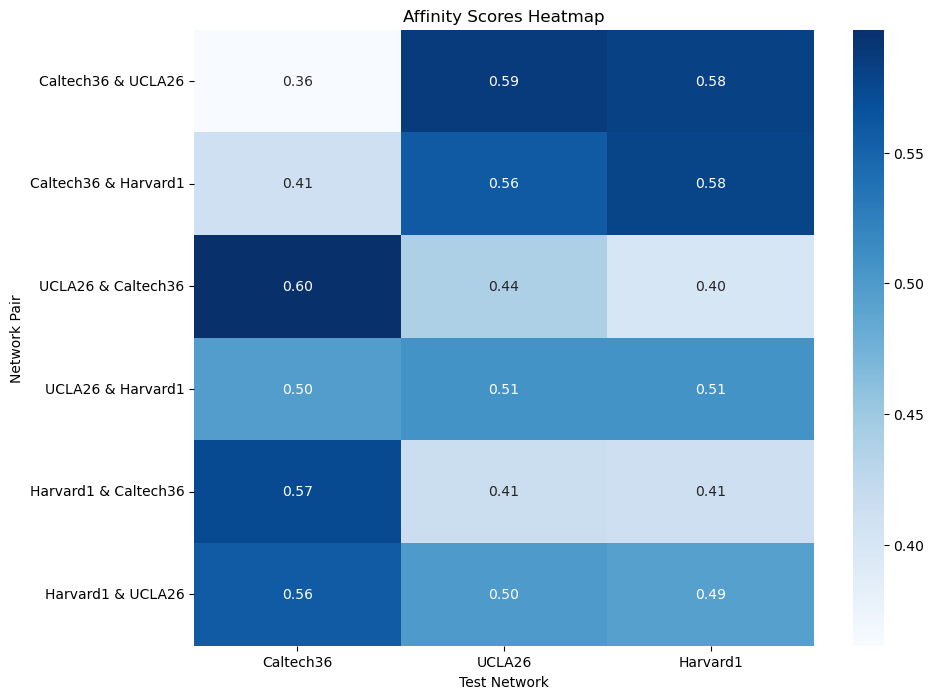

In [4]:
# Example usage 1
ntwk_list = ["Caltech36", "UCLA26", 'Harvard1']
sample_size_list = [125, 125]
k = 7
n_components = 16
iterations = 125

affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations)

Iteration: (0, 1, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
73280.0
33560.0
initial loading beta [[ 0.87289732 -0.54681875  0.87351084 -0.42473961 -0.35716894  0.7428971
   0.34468755  0.90392723  0.79162206 -0.2257054   0.15412014 -0.16920494
   0.82016068 -0.73178425  0.14832143  0.69550089 -0.88004377]]


  1%|          | 2/250 [00:00<00:14, 17.34it/s]

--- Training --- [threshold, AUC] =  [0.722, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79560.925350.3, 69.312911.3, 159191.163612.3]


  4%|▍         | 10/250 [00:00<00:11, 20.14it/s]

--- Training --- [threshold, AUC] =  [0.642, 0.995]
--- Iteration 10: Training loss --- [Data, Label, Total] = [46565.097920.3, 77.294003.3, 93207.489843.3]
!!! pred_type filter


  6%|▌         | 15/250 [00:01<00:29,  7.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.642, 0.995, 0.982, 0.982]


  8%|▊         | 20/250 [00:01<00:19, 11.92it/s]

--- Training --- [threshold, AUC] =  [0.735, 0.996]
--- Iteration 20: Training loss --- [Data, Label, Total] = [44703.532733.3, 73.696945.3, 89480.762412.3]
!!! pred_type filter


  9%|▉         | 22/250 [00:02<00:39,  5.82it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.735, 0.996, 0.983, 0.983]


 11%|█         | 28/250 [00:02<00:22,  9.98it/s]

--- Training --- [threshold, AUC] =  [0.738, 0.996]
--- Iteration 30: Training loss --- [Data, Label, Total] = [43408.760840.3, 72.519901.3, 86890.041581.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:03<00:28,  7.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.738, 0.996, 0.984, 0.984]


 16%|█▌        | 39/250 [00:04<00:17, 11.75it/s]

--- Training --- [threshold, AUC] =  [0.747, 0.996]
--- Iteration 40: Training loss --- [Data, Label, Total] = [42685.236046.3, 72.388093.3, 85442.860185.3]
!!! pred_type filter


 17%|█▋        | 43/250 [00:04<00:27,  7.66it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.747, 0.996, 0.984, 0.984]


 20%|█▉        | 49/250 [00:05<00:16, 11.96it/s]

--- Training --- [threshold, AUC] =  [0.693, 0.996]
--- Iteration 50: Training loss --- [Data, Label, Total] = [42229.203515.3, 72.708727.3, 84531.115756.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:25,  7.67it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.693, 0.996, 0.983, 0.983]


 24%|██▎       | 59/250 [00:06<00:15, 12.05it/s]

--- Training --- [threshold, AUC] =  [0.683, 0.996]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41909.054956.3, 73.262216.3, 83891.372128.3]
!!! pred_type filter


 25%|██▌       | 63/250 [00:07<00:24,  7.51it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.683, 0.996, 0.983, 0.983]


 27%|██▋       | 68/250 [00:07<00:16, 11.08it/s]

--- Training --- [threshold, AUC] =  [0.675, 0.996]
--- Iteration 70: Training loss --- [Data, Label, Total] = [41671.160687.3, 73.922727.3, 83416.244101.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:08<00:22,  7.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.675, 0.996, 0.983, 0.983]


 32%|███▏      | 79/250 [00:08<00:14, 11.79it/s]

--- Training --- [threshold, AUC] =  [0.722, 0.996]
--- Iteration 80: Training loss --- [Data, Label, Total] = [41488.942304.3, 74.559700.3, 83052.444308.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:09<00:22,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.722, 0.996, 0.982, 0.982]


 36%|███▌      | 89/250 [00:10<00:13, 11.88it/s]

--- Training --- [threshold, AUC] =  [0.73, 0.996]
--- Iteration 90: Training loss --- [Data, Label, Total] = [41346.124422.3, 75.091980.3, 82767.340825.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:10<00:20,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.73, 0.996, 0.982, 0.982]


 39%|███▉      | 98/250 [00:11<00:14, 10.49it/s]

--- Training --- [threshold, AUC] =  [0.731, 0.996]
--- Iteration 100: Training loss --- [Data, Label, Total] = [41230.917680.3, 75.574845.3, 82537.410204.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:19,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.731, 0.996, 0.982, 0.982]


 43%|████▎     | 108/250 [00:12<00:12, 11.26it/s]

--- Training --- [threshold, AUC] =  [0.717, 0.996]
--- Iteration 110: Training loss --- [Data, Label, Total] = [41136.189820.3, 75.966128.3, 82348.345768.3]
!!! pred_type filter


 45%|████▌     | 113/250 [00:13<00:17,  7.81it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.717, 0.996, 0.983, 0.983]


 48%|████▊     | 119/250 [00:13<00:10, 12.06it/s]

--- Training --- [threshold, AUC] =  [0.715, 0.996]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41056.606855.3, 76.284792.3, 82189.498502.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:14<00:17,  7.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.715, 0.996, 0.983, 0.983]


 52%|█████▏    | 130/250 [00:14<00:09, 12.03it/s]

--- Training --- [threshold, AUC] =  [0.714, 0.996]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40989.207036.3, 76.520420.3, 82054.934493.3]
!!! pred_type filter


 53%|█████▎    | 132/250 [00:15<00:21,  5.57it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.714, 0.996, 0.982, 0.982]


 56%|█████▌    | 140/250 [00:16<00:09, 11.14it/s]

--- Training --- [threshold, AUC] =  [0.704, 0.996]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40931.640493.3, 76.694199.3, 81939.975186.3]
!!! pred_type filter


 57%|█████▋    | 142/250 [00:17<00:19,  5.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.704, 0.996, 0.982, 0.982]


 60%|██████    | 150/250 [00:17<00:08, 11.42it/s]

--- Training --- [threshold, AUC] =  [0.7, 0.996]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40882.063616.3, 76.798974.3, 81840.926205.3]
!!! pred_type filter


 61%|██████    | 152/250 [00:18<00:16,  5.88it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.7, 0.996, 0.982, 0.982]


 64%|██████▎   | 159/250 [00:18<00:08, 10.70it/s]

--- Training --- [threshold, AUC] =  [0.698, 0.996]
--- Iteration 160: Training loss --- [Data, Label, Total] = [40838.756179.3, 76.858799.3, 81754.371157.3]
!!! pred_type filter


 65%|██████▌   | 163/250 [00:19<00:12,  6.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.698, 0.996, 0.982, 0.982]


 68%|██████▊   | 170/250 [00:19<00:06, 12.72it/s]

--- Training --- [threshold, AUC] =  [0.723, 0.996]
--- Iteration 170: Training loss --- [Data, Label, Total] = [40800.363553.3, 76.891852.3, 81677.618958.3]
!!! pred_type filter


 70%|███████   | 175/250 [00:20<00:09,  7.99it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.723, 0.996, 0.981, 0.981]


 72%|███████▏  | 179/250 [00:21<00:06, 10.77it/s]

--- Training --- [threshold, AUC] =  [0.694, 0.996]
--- Iteration 180: Training loss --- [Data, Label, Total] = [40765.750374.3, 76.903260.3, 81608.404007.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:22<00:09,  7.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.694, 0.996, 0.981, 0.981]


 75%|███████▌  | 188/250 [00:22<00:05, 11.12it/s]

--- Training --- [threshold, AUC] =  [0.693, 0.996]
--- Iteration 190: Training loss --- [Data, Label, Total] = [40734.422663.3, 76.907877.3, 81545.753203.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.693, 0.996, 0.981, 0.981]


 80%|████████  | 200/250 [00:23<00:03, 13.00it/s]

--- Training --- [threshold, AUC] =  [0.686, 0.996]
--- Iteration 200: Training loss --- [Data, Label, Total] = [40706.293261.3, 76.915043.3, 81489.501566.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:24<00:06,  7.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.686, 0.996, 0.981, 0.981]


 84%|████████▍ | 210/250 [00:24<00:03, 11.72it/s]

--- Training --- [threshold, AUC] =  [0.684, 0.996]
--- Iteration 210: Training loss --- [Data, Label, Total] = [40680.964673.3, 76.902916.3, 81438.832261.3]
!!! pred_type filter


 86%|████████▌ | 214/250 [00:25<00:05,  6.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.684, 0.996, 0.981, 0.981]


 88%|████████▊ | 219/250 [00:26<00:02, 10.66it/s]

--- Training --- [threshold, AUC] =  [0.681, 0.996]
--- Iteration 220: Training loss --- [Data, Label, Total] = [40658.139336.3, 76.880359.3, 81393.159031.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:26<00:03,  6.96it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.681, 0.996, 0.981, 0.981]


 91%|█████████ | 228/250 [00:27<00:02, 10.60it/s]

--- Training --- [threshold, AUC] =  [0.766, 0.996]
--- Iteration 230: Training loss --- [Data, Label, Total] = [40637.481975.3, 76.853297.3, 81351.817248.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:28<00:02,  7.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.766, 0.996, 0.981, 0.981]


 96%|█████████▌| 239/250 [00:28<00:00, 11.84it/s]

--- Training --- [threshold, AUC] =  [0.766, 0.996]
--- Iteration 240: Training loss --- [Data, Label, Total] = [40618.739399.3, 76.814127.3, 81314.292924.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:29<00:00,  7.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.766, 0.996, 0.981, 0.981]


100%|██████████| 250/250 [00:29<00:00,  8.41it/s]


!!! pred_type filter
Iteration: (0, 1, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
71610.0
33944.0
initial loading beta [[-0.89284465  0.07363102  0.09636751  0.86631702  0.65354261  0.17337738
   0.49800078  0.35541672  0.99481261 -0.1120592  -0.68871523 -0.71429215
  -0.05938222 -0.67936035  0.18052647  0.71443542 -0.06044953]]


  1%|          | 2/250 [00:00<00:18, 13.25it/s]

--- Training --- [threshold, AUC] =  [0.588, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79109.587834.3, 75.147580.3, 158294.323247.3]


  3%|▎         | 8/250 [00:00<00:13, 17.95it/s]

--- Training --- [threshold, AUC] =  [0.569, 0.995]
--- Iteration 10: Training loss --- [Data, Label, Total] = [45790.508468.3, 88.090036.3, 91669.106971.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:33,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.569, 0.995, 0.976, 0.976]


  8%|▊         | 19/250 [00:01<00:19, 11.73it/s]

--- Training --- [threshold, AUC] =  [0.53, 0.996]
--- Iteration 20: Training loss --- [Data, Label, Total] = [43878.242706.3, 83.708709.3, 87840.194121.3]
!!! pred_type filter


  9%|▉         | 23/250 [00:02<00:33,  6.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.53, 0.996, 0.98, 0.98]


 11%|█         | 28/250 [00:03<00:21, 10.17it/s]

--- Training --- [threshold, AUC] =  [0.524, 0.996]
--- Iteration 30: Training loss --- [Data, Label, Total] = [42570.023484.3, 83.046466.3, 85223.093434.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:04<00:31,  6.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.524, 0.996, 0.98, 0.98]


 16%|█▌        | 40/250 [00:04<00:17, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.504, 0.996]
--- Iteration 40: Training loss --- [Data, Label, Total] = [41847.060957.3, 83.403637.3, 83777.525551.3]
!!! pred_type filter


 18%|█▊        | 44/250 [00:05<00:28,  7.25it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.504, 0.996, 0.979, 0.979]


 20%|█▉        | 49/250 [00:05<00:18, 10.83it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.996]
--- Iteration 50: Training loss --- [Data, Label, Total] = [41402.565429.3, 83.712893.3, 82888.843752.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:27,  7.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.562, 0.996, 0.978, 0.978]


 24%|██▍       | 60/250 [00:07<00:14, 12.74it/s]

--- Training --- [threshold, AUC] =  [0.525, 0.996]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41101.632846.3, 83.975239.3, 82287.240931.3]
!!! pred_type filter


 26%|██▌       | 64/250 [00:07<00:24,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.525, 0.996, 0.979, 0.979]


 28%|██▊       | 70/250 [00:08<00:15, 11.72it/s]

--- Training --- [threshold, AUC] =  [0.544, 0.996]
--- Iteration 70: Training loss --- [Data, Label, Total] = [40883.911393.3, 84.241404.3, 81852.064190.3]
!!! pred_type filter


 30%|███       | 75/250 [00:09<00:21,  8.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.544, 0.996, 0.979, 0.979]


 32%|███▏      | 79/250 [00:09<00:15, 11.01it/s]

--- Training --- [threshold, AUC] =  [0.546, 0.996]
--- Iteration 80: Training loss --- [Data, Label, Total] = [40716.905925.3, 84.535734.3, 81518.347584.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:10<00:23,  7.20it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.546, 0.996, 0.978, 0.978]


 36%|███▌      | 89/250 [00:10<00:13, 11.68it/s]

--- Training --- [threshold, AUC] =  [0.588, 0.996]
--- Iteration 90: Training loss --- [Data, Label, Total] = [40580.164045.3, 84.781063.3, 81245.109154.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:11<00:20,  7.57it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.588, 0.996, 0.977, 0.977]


 40%|████      | 100/250 [00:11<00:11, 13.10it/s]

--- Training --- [threshold, AUC] =  [0.598, 0.996]
--- Iteration 100: Training loss --- [Data, Label, Total] = [40464.064209.3, 85.000080.3, 81013.128499.3]
!!! pred_type filter


 42%|████▏     | 104/250 [00:12<00:19,  7.51it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.598, 0.996, 0.977, 0.977]


 44%|████▍     | 110/250 [00:12<00:11, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.996]
--- Iteration 110: Training loss --- [Data, Label, Total] = [40362.659909.3, 85.209771.3, 80810.529589.3]
!!! pred_type filter


 46%|████▌     | 114/250 [00:13<00:17,  7.69it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.601, 0.996, 0.977, 0.977]


 47%|████▋     | 118/250 [00:14<00:12, 10.64it/s]

--- Training --- [threshold, AUC] =  [0.638, 0.996]
--- Iteration 120: Training loss --- [Data, Label, Total] = [40273.261796.3, 85.426999.3, 80631.950592.3]
!!! pred_type filter


 50%|████▉     | 124/250 [00:14<00:15,  8.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.638, 0.996, 0.977, 0.977]


 52%|█████▏    | 130/250 [00:15<00:09, 12.63it/s]

--- Training --- [threshold, AUC] =  [0.619, 0.996]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40194.582087.3, 85.591524.3, 80474.755698.3]
!!! pred_type filter


 54%|█████▍    | 135/250 [00:16<00:13,  8.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.619, 0.996, 0.978, 0.978]


 56%|█████▌    | 140/250 [00:16<00:09, 12.13it/s]

--- Training --- [threshold, AUC] =  [0.625, 0.996]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40125.322050.3, 85.716881.3, 80336.360981.3]
!!! pred_type filter


 58%|█████▊    | 144/250 [00:17<00:14,  7.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.625, 0.996, 0.978, 0.978]


 59%|█████▉    | 148/250 [00:17<00:09, 10.45it/s]

--- Training --- [threshold, AUC] =  [0.629, 0.996]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40063.882178.3, 85.808418.3, 80213.572774.3]
!!! pred_type filter


 61%|██████    | 153/250 [00:18<00:12,  7.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.629, 0.996, 0.978, 0.978]


 63%|██████▎   | 158/250 [00:18<00:08, 11.36it/s]

--- Training --- [threshold, AUC] =  [0.622, 0.996]
--- Iteration 160: Training loss --- [Data, Label, Total] = [40009.333084.3, 85.861029.3, 80104.527197.3]
!!! pred_type filter


 66%|██████▌   | 164/250 [00:19<00:09,  8.62it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.622, 0.996, 0.978, 0.978]


 68%|██████▊   | 170/250 [00:19<00:06, 12.72it/s]

--- Training --- [threshold, AUC] =  [0.616, 0.996]
--- Iteration 170: Training loss --- [Data, Label, Total] = [39961.163790.3, 85.909432.3, 80008.237012.3]
!!! pred_type filter


 70%|██████▉   | 174/250 [00:20<00:09,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.616, 0.996, 0.978, 0.978]


 72%|███████▏  | 179/250 [00:21<00:06, 11.20it/s]

--- Training --- [threshold, AUC] =  [0.603, 0.996]
--- Iteration 180: Training loss --- [Data, Label, Total] = [39918.764281.3, 85.906874.3, 79923.435436.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:21<00:08,  7.46it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.603, 0.996, 0.979, 0.979]


 76%|███████▌  | 189/250 [00:22<00:04, 12.40it/s]

--- Training --- [threshold, AUC] =  [0.602, 0.996]
--- Iteration 190: Training loss --- [Data, Label, Total] = [39881.576847.3, 85.878721.3, 79849.032416.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.602, 0.996, 0.979, 0.979]


 80%|███████▉  | 199/250 [00:23<00:04, 12.46it/s]

--- Training --- [threshold, AUC] =  [0.601, 0.996]
--- Iteration 200: Training loss --- [Data, Label, Total] = [39848.443471.3, 85.836358.3, 79782.723300.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:24<00:05,  8.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.601, 0.996, 0.979, 0.979]


 84%|████████▍ | 210/250 [00:24<00:03, 12.58it/s]

--- Training --- [threshold, AUC] =  [0.6, 0.996]
--- Iteration 210: Training loss --- [Data, Label, Total] = [39818.494437.3, 85.778245.3, 79722.767119.3]
!!! pred_type filter


 85%|████████▍ | 212/250 [00:25<00:05,  6.63it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.6, 0.996, 0.979, 0.979]


 87%|████████▋ | 218/250 [00:25<00:03, 10.66it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.996]
--- Iteration 220: Training loss --- [Data, Label, Total] = [39791.262205.3, 85.714268.3, 79668.238679.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:26<00:03,  7.95it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.996, 0.98, 0.98]


 92%|█████████▏| 229/250 [00:26<00:01, 12.01it/s]

--- Training --- [threshold, AUC] =  [0.541, 0.996]
--- Iteration 230: Training loss --- [Data, Label, Total] = [39766.358398.3, 85.641864.3, 79618.358660.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:27<00:02,  7.91it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.541, 0.996, 0.98, 0.98]


 95%|█████████▌| 238/250 [00:27<00:01, 11.45it/s]

--- Training --- [threshold, AUC] =  [0.544, 0.996]
--- Iteration 240: Training loss --- [Data, Label, Total] = [39743.488882.3, 85.566463.3, 79572.544227.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:28<00:00,  8.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.544, 0.996, 0.98, 0.98]


100%|██████████| 250/250 [00:29<00:00,  8.58it/s]


!!! pred_type filter
Iteration: (1, 0, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
34142.0
71750.0
initial loading beta [[ 0.66373844 -0.3774882  -0.10537219 -0.21627714 -0.79540069  0.23955014
  -0.59536243 -0.96237309 -0.35851907  0.99955484  0.49006648 -0.14043191
  -0.73155232  0.50471473  0.75141913 -0.55971312 -0.24877086]]


  1%|          | 2/250 [00:00<00:16, 15.20it/s]

--- Training --- [threshold, AUC] =  [0.547, 0.997]
--- Iteration 0: Training loss --- [Data, Label, Total] = [79369.848660.3, 69.215401.3, 158808.912721.3]


  3%|▎         | 8/250 [00:00<00:12, 19.08it/s]

--- Training --- [threshold, AUC] =  [0.513, 0.997]
--- Iteration 10: Training loss --- [Data, Label, Total] = [45885.104709.3, 76.394239.3, 91846.603657.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:31,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.513, 0.997, 0.981, 0.981]


  7%|▋         | 18/250 [00:01<00:21, 10.90it/s]

--- Training --- [threshold, AUC] =  [0.487, 0.997]
--- Iteration 20: Training loss --- [Data, Label, Total] = [43845.269558.3, 71.556599.3, 87762.095715.3]
!!! pred_type filter


  9%|▉         | 23/250 [00:02<00:29,  7.59it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.487, 0.997, 0.982, 0.982]


 11%|█         | 28/250 [00:02<00:19, 11.12it/s]

--- Training --- [threshold, AUC] =  [0.459, 0.998]
--- Iteration 30: Training loss --- [Data, Label, Total] = [42545.506070.3, 71.037637.3, 85162.049778.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:03<00:29,  7.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.459, 0.998, 0.982, 0.982]


 16%|█▌        | 39/250 [00:04<00:18, 11.62it/s]

--- Training --- [threshold, AUC] =  [0.45, 0.998]
--- Iteration 40: Training loss --- [Data, Label, Total] = [41840.162525.3, 71.644921.3, 83751.969972.3]
!!! pred_type filter


 17%|█▋        | 43/250 [00:05<00:28,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.45, 0.998, 0.981, 0.981]


 19%|█▉        | 48/250 [00:05<00:18, 11.00it/s]

--- Training --- [threshold, AUC] =  [0.44, 0.998]
--- Iteration 50: Training loss --- [Data, Label, Total] = [41418.411678.3, 72.074599.3, 82908.897955.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:26,  7.36it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.44, 0.998, 0.981, 0.981]


 24%|██▎       | 59/250 [00:06<00:16, 11.48it/s]

--- Training --- [threshold, AUC] =  [0.509, 0.998]
--- Iteration 60: Training loss --- [Data, Label, Total] = [41125.395206.3, 72.290372.3, 82323.080784.3]
!!! pred_type filter


 25%|██▌       | 63/250 [00:07<00:24,  7.54it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.509, 0.998, 0.981, 0.981]


 27%|██▋       | 68/250 [00:07<00:16, 10.88it/s]

--- Training --- [threshold, AUC] =  [0.519, 0.998]
--- Iteration 70: Training loss --- [Data, Label, Total] = [40897.225476.3, 72.413430.3, 81866.864381.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:08<00:23,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.519, 0.998, 0.981, 0.981]


 32%|███▏      | 79/250 [00:09<00:14, 11.69it/s]

--- Training --- [threshold, AUC] =  [0.511, 0.998]
--- Iteration 80: Training loss --- [Data, Label, Total] = [40709.576000.3, 72.523890.3, 81491.675889.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:09<00:21,  7.61it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.511, 0.998, 0.981, 0.981]


 35%|███▌      | 88/250 [00:10<00:15, 10.77it/s]

--- Training --- [threshold, AUC] =  [0.5, 0.998]
--- Iteration 90: Training loss --- [Data, Label, Total] = [40554.154108.3, 72.690752.3, 81180.998967.3]
!!! pred_type filter


 37%|███▋      | 93/250 [00:11<00:20,  7.56it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.5, 0.998, 0.981, 0.981]


 40%|███▉      | 99/250 [00:11<00:12, 11.82it/s]

--- Training --- [threshold, AUC] =  [0.522, 0.998]
--- Iteration 100: Training loss --- [Data, Label, Total] = [40423.222001.3, 72.892533.3, 80919.336534.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:19,  7.64it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.522, 0.998, 0.98, 0.98]


 43%|████▎     | 108/250 [00:12<00:12, 11.36it/s]

--- Training --- [threshold, AUC] =  [0.516, 0.998]
--- Iteration 110: Training loss --- [Data, Label, Total] = [40312.225624.3, 73.138831.3, 80697.590079.3]
!!! pred_type filter


 45%|████▌     | 113/250 [00:13<00:17,  7.89it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.516, 0.998, 0.98, 0.98]


 48%|████▊     | 119/250 [00:13<00:10, 11.93it/s]

--- Training --- [threshold, AUC] =  [0.475, 0.998]
--- Iteration 120: Training loss --- [Data, Label, Total] = [40218.594517.3, 73.372093.3, 80510.561126.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:14<00:16,  7.47it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.475, 0.998, 0.98, 0.98]


 51%|█████     | 128/250 [00:14<00:11, 10.80it/s]

--- Training --- [threshold, AUC] =  [0.472, 0.998]
--- Iteration 130: Training loss --- [Data, Label, Total] = [40139.067235.3, 73.563101.3, 80351.697571.3]
!!! pred_type filter


 54%|█████▎    | 134/250 [00:15<00:13,  8.30it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.472, 0.998, 0.98, 0.98]


 55%|█████▌    | 138/250 [00:16<00:10, 10.95it/s]

--- Training --- [threshold, AUC] =  [0.317, 0.998]
--- Iteration 140: Training loss --- [Data, Label, Total] = [40070.403292.3, 73.735504.3, 80214.542088.3]
!!! pred_type filter


 57%|█████▋    | 143/250 [00:17<00:13,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.317, 0.998, 0.98, 0.98]


 59%|█████▉    | 148/250 [00:17<00:09, 11.07it/s]

--- Training --- [threshold, AUC] =  [0.32, 0.998]
--- Iteration 150: Training loss --- [Data, Label, Total] = [40010.369776.3, 73.891102.3, 80094.630655.3]
!!! pred_type filter


 61%|██████    | 153/250 [00:18<00:12,  7.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.32, 0.998, 0.98, 0.98]


 64%|██████▍   | 160/250 [00:18<00:07, 12.65it/s]

--- Training --- [threshold, AUC] =  [0.322, 0.998]
--- Iteration 160: Training loss --- [Data, Label, Total] = [39957.766225.3, 74.011736.3, 79989.544186.3]
!!! pred_type filter


 66%|██████▌   | 164/250 [00:19<00:11,  7.73it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.322, 0.998, 0.98, 0.98]


 67%|██████▋   | 168/250 [00:19<00:07, 10.55it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.998]
--- Iteration 170: Training loss --- [Data, Label, Total] = [39911.728047.3, 74.145669.3, 79897.601762.3]
!!! pred_type filter


 69%|██████▉   | 173/250 [00:20<00:10,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.323, 0.998, 0.98, 0.98]


 72%|███████▏  | 179/250 [00:20<00:06, 11.62it/s]

--- Training --- [threshold, AUC] =  [0.324, 0.998]
--- Iteration 180: Training loss --- [Data, Label, Total] = [39871.243800.3, 74.245653.3, 79816.733253.3]
!!! pred_type filter


 73%|███████▎  | 183/250 [00:21<00:08,  7.65it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.324, 0.998, 0.98, 0.98]


 76%|███████▌  | 189/250 [00:22<00:05, 11.65it/s]

--- Training --- [threshold, AUC] =  [0.325, 0.998]
--- Iteration 190: Training loss --- [Data, Label, Total] = [39835.698898.3, 74.317985.3, 79745.715781.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:23<00:07,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.325, 0.998, 0.98, 0.98]


 79%|███████▉  | 198/250 [00:23<00:04, 11.13it/s]

--- Training --- [threshold, AUC] =  [0.327, 0.998]
--- Iteration 200: Training loss --- [Data, Label, Total] = [39804.551541.3, 74.345995.3, 79683.449077.3]
!!! pred_type filter


 81%|████████  | 203/250 [00:24<00:05,  7.84it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.327, 0.998, 0.98, 0.98]


 84%|████████▎ | 209/250 [00:24<00:03, 11.86it/s]

--- Training --- [threshold, AUC] =  [0.362, 0.998]
--- Iteration 210: Training loss --- [Data, Label, Total] = [39777.373918.3, 74.327062.3, 79629.074898.3]
!!! pred_type filter


 85%|████████▌ | 213/250 [00:25<00:04,  7.74it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.362, 0.998, 0.98, 0.98]


 88%|████████▊ | 220/250 [00:25<00:02, 12.97it/s]

--- Training --- [threshold, AUC] =  [0.367, 0.998]
--- Iteration 220: Training loss --- [Data, Label, Total] = [39753.281447.3, 74.289097.3, 79580.851991.3]
!!! pred_type filter


 90%|████████▉ | 224/250 [00:26<00:03,  7.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.367, 0.998, 0.98, 0.98]


 92%|█████████▏| 229/250 [00:26<00:01, 10.86it/s]

--- Training --- [threshold, AUC] =  [0.373, 0.998]
--- Iteration 230: Training loss --- [Data, Label, Total] = [39731.594649.3, 74.241707.3, 79537.431005.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:27<00:02,  7.33it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.373, 0.998, 0.98, 0.98]


 96%|█████████▌| 239/250 [00:28<00:00, 12.02it/s]

--- Training --- [threshold, AUC] =  [0.379, 0.998]
--- Iteration 240: Training loss --- [Data, Label, Total] = [39711.838620.3, 74.177313.3, 79497.854552.3]
!!! pred_type filter


 97%|█████████▋| 243/250 [00:29<00:00,  7.34it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.379, 0.998, 0.98, 0.98]


100%|██████████| 250/250 [00:29<00:00,  8.51it/s]


!!! pred_type filter
Iteration: (1, 0, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
34178.0
73244.0
initial loading beta [[ 0.10823806 -0.08929217  0.41796262  0.36005515 -0.75190198  0.57283748
   0.54094307 -0.44269236 -0.319608   -0.80275717 -0.88041389  0.80518193
   0.1136975  -0.33478348  0.71805603  0.33194441 -0.17090164]]


  1%|          | 2/250 [00:00<00:14, 16.77it/s]

--- Training --- [threshold, AUC] =  [0.407, 0.998]
--- Iteration 0: Training loss --- [Data, Label, Total] = [80227.411311.3, 60.930905.3, 160515.753526.3]


  4%|▎         | 9/250 [00:00<00:13, 17.47it/s]

--- Training --- [threshold, AUC] =  [0.322, 0.998]
--- Iteration 10: Training loss --- [Data, Label, Total] = [47163.196129.3, 68.585314.3, 94394.977572.3]
!!! pred_type filter


  5%|▌         | 13/250 [00:01<00:35,  6.70it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.322, 0.998, 0.983, 0.983]


  8%|▊         | 20/250 [00:01<00:18, 12.54it/s]

--- Training --- [threshold, AUC] =  [0.384, 0.998]
--- Iteration 20: Training loss --- [Data, Label, Total] = [45185.803431.3, 65.986445.3, 90437.593307.3]
!!! pred_type filter


 10%|▉         | 24/250 [00:02<00:31,  7.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.384, 0.998, 0.984, 0.984]


 12%|█▏        | 29/250 [00:03<00:19, 11.06it/s]

--- Training --- [threshold, AUC] =  [0.363, 0.998]
--- Iteration 30: Training loss --- [Data, Label, Total] = [43842.969526.3, 65.637920.3, 87751.576972.3]
!!! pred_type filter


 13%|█▎        | 33/250 [00:04<00:30,  7.09it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.363, 0.998, 0.985, 0.985]


 16%|█▌        | 40/250 [00:04<00:17, 12.09it/s]

--- Training --- [threshold, AUC] =  [0.289, 0.999]
--- Iteration 40: Training loss --- [Data, Label, Total] = [43052.146117.3, 65.549165.3, 86169.841400.3]
!!! pred_type filter


 18%|█▊        | 44/250 [00:05<00:28,  7.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.289, 0.999, 0.985, 0.985]


 20%|█▉        | 49/250 [00:05<00:18, 10.91it/s]

--- Training --- [threshold, AUC] =  [0.387, 0.999]
--- Iteration 50: Training loss --- [Data, Label, Total] = [42592.183286.3, 65.545120.3, 85249.911693.3]
!!! pred_type filter


 21%|██        | 53/250 [00:06<00:28,  7.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.387, 0.999, 0.984, 0.984]


 24%|██▍       | 60/250 [00:06<00:15, 12.63it/s]

--- Training --- [threshold, AUC] =  [0.39, 0.999]
--- Iteration 60: Training loss --- [Data, Label, Total] = [42294.835731.3, 65.699123.3, 84655.370586.3]
!!! pred_type filter


 26%|██▌       | 64/250 [00:07<00:25,  7.35it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.39, 0.999, 0.984, 0.984]


 27%|██▋       | 68/250 [00:08<00:17, 10.36it/s]

--- Training --- [threshold, AUC] =  [0.348, 0.999]
--- Iteration 70: Training loss --- [Data, Label, Total] = [42082.898377.3, 65.721749.3, 84231.518503.3]
!!! pred_type filter


 29%|██▉       | 73/250 [00:09<00:25,  6.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.348, 0.999, 0.985, 0.985]


 32%|███▏      | 79/250 [00:09<00:15, 11.03it/s]

--- Training --- [threshold, AUC] =  [0.347, 0.999]
--- Iteration 80: Training loss --- [Data, Label, Total] = [41922.499438.3, 65.742420.3, 83910.741296.3]
!!! pred_type filter


 33%|███▎      | 83/250 [00:10<00:23,  7.14it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.347, 0.999, 0.985, 0.985]


 36%|███▌      | 90/250 [00:10<00:12, 12.60it/s]

--- Training --- [threshold, AUC] =  [0.347, 0.999]
--- Iteration 90: Training loss --- [Data, Label, Total] = [41794.465195.3, 65.767772.3, 83654.698162.3]
!!! pred_type filter


 38%|███▊      | 94/250 [00:11<00:21,  7.38it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.347, 0.999, 0.985, 0.985]


 40%|███▉      | 99/250 [00:11<00:14, 10.58it/s]

--- Training --- [threshold, AUC] =  [0.401, 0.999]
--- Iteration 100: Training loss --- [Data, Label, Total] = [41689.012743.3, 65.785911.3, 83443.811398.3]
!!! pred_type filter


 41%|████      | 103/250 [00:12<00:20,  7.02it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.999, 0.985, 0.985]


 44%|████▍     | 110/250 [00:13<00:11, 12.03it/s]

--- Training --- [threshold, AUC] =  [0.402, 0.999]
--- Iteration 110: Training loss --- [Data, Label, Total] = [41599.479920.3, 65.756779.3, 83264.716619.3]
!!! pred_type filter


 46%|████▌     | 114/250 [00:14<00:19,  7.08it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.402, 0.999, 0.985, 0.985]


 47%|████▋     | 118/250 [00:14<00:12, 10.20it/s]

--- Training --- [threshold, AUC] =  [0.405, 0.999]
--- Iteration 120: Training loss --- [Data, Label, Total] = [41523.054899.3, 65.685302.3, 83111.795100.3]
!!! pred_type filter


 49%|████▉     | 123/250 [00:15<00:17,  7.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.405, 0.999, 0.985, 0.985]


 52%|█████▏    | 130/250 [00:15<00:09, 12.10it/s]

--- Training --- [threshold, AUC] =  [0.408, 0.999]
--- Iteration 130: Training loss --- [Data, Label, Total] = [41456.624454.3, 65.624030.3, 82978.872937.3]
!!! pred_type filter


 53%|█████▎    | 132/250 [00:16<00:19,  5.94it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.999, 0.985, 0.985]


 56%|█████▌    | 139/250 [00:16<00:10, 10.92it/s]

--- Training --- [threshold, AUC] =  [0.41, 0.999]
--- Iteration 140: Training loss --- [Data, Label, Total] = [41398.386778.3, 65.583275.3, 82862.356831.3]
!!! pred_type filter


 57%|█████▋    | 143/250 [00:17<00:15,  7.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.41, 0.999, 0.985, 0.985]


 60%|██████    | 150/250 [00:18<00:07, 12.51it/s]

--- Training --- [threshold, AUC] =  [0.408, 0.999]
--- Iteration 150: Training loss --- [Data, Label, Total] = [41346.646547.3, 65.545818.3, 82758.838912.3]
!!! pred_type filter


 62%|██████▏   | 154/250 [00:19<00:13,  7.27it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.408, 0.999, 0.985, 0.985]


 63%|██████▎   | 158/250 [00:19<00:08, 10.53it/s]

--- Training --- [threshold, AUC] =  [0.406, 0.999]
--- Iteration 160: Training loss --- [Data, Label, Total] = [41300.182829.3, 65.506625.3, 82665.872283.3]
!!! pred_type filter


 65%|██████▌   | 163/250 [00:20<00:12,  7.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.406, 0.999, 0.985, 0.985]


 68%|██████▊   | 169/250 [00:20<00:06, 11.75it/s]

--- Training --- [threshold, AUC] =  [0.404, 0.999]
--- Iteration 170: Training loss --- [Data, Label, Total] = [41258.181411.3, 65.456284.3, 82581.819106.3]
!!! pred_type filter


 69%|██████▉   | 173/250 [00:21<00:10,  7.06it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.404, 0.999, 0.985, 0.985]


 72%|███████▏  | 180/250 [00:21<00:05, 12.98it/s]

--- Training --- [threshold, AUC] =  [0.401, 0.999]
--- Iteration 180: Training loss --- [Data, Label, Total] = [41219.638872.3, 65.404134.3, 82504.681878.3]
!!! pred_type filter


 74%|███████▎  | 184/250 [00:22<00:08,  7.41it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.401, 0.999, 0.985, 0.985]


 75%|███████▌  | 188/250 [00:23<00:06, 10.26it/s]

--- Training --- [threshold, AUC] =  [0.398, 0.999]
--- Iteration 190: Training loss --- [Data, Label, Total] = [41184.219052.3, 65.373150.3, 82433.811255.3]
!!! pred_type filter


 77%|███████▋  | 193/250 [00:24<00:08,  7.03it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.398, 0.999, 0.985, 0.985]


 80%|████████  | 200/250 [00:24<00:04, 12.17it/s]

--- Training --- [threshold, AUC] =  [0.395, 0.999]
--- Iteration 200: Training loss --- [Data, Label, Total] = [41151.528401.3, 65.355563.3, 82368.412365.3]
!!! pred_type filter


 82%|████████▏ | 204/250 [00:25<00:06,  7.42it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.395, 0.999, 0.985, 0.985]


 84%|████████▎ | 209/250 [00:25<00:03, 11.11it/s]

--- Training --- [threshold, AUC] =  [0.393, 0.999]
--- Iteration 210: Training loss --- [Data, Label, Total] = [41121.394952.3, 65.340827.3, 82308.130731.3]
!!! pred_type filter


 85%|████████▌ | 213/250 [00:26<00:05,  7.21it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.393, 0.999, 0.985, 0.985]


 87%|████████▋ | 218/250 [00:26<00:02, 10.71it/s]

--- Training --- [threshold, AUC] =  [0.442, 0.999]
--- Iteration 220: Training loss --- [Data, Label, Total] = [41093.568166.3, 65.331033.3, 82252.467364.3]
!!! pred_type filter


 89%|████████▉ | 223/250 [00:27<00:03,  7.49it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.442, 0.999, 0.985, 0.985]


 91%|█████████ | 228/250 [00:28<00:02, 10.27it/s]

--- Training --- [threshold, AUC] =  [0.445, 0.999]
--- Iteration 230: Training loss --- [Data, Label, Total] = [41067.892964.3, 65.321579.3, 82201.107507.3]
!!! pred_type filter


 93%|█████████▎| 233/250 [00:28<00:02,  7.40it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.445, 0.999, 0.985, 0.985]


 96%|█████████▌| 240/250 [00:29<00:00, 12.06it/s]

--- Training --- [threshold, AUC] =  [0.447, 0.999]
--- Iteration 240: Training loss --- [Data, Label, Total] = [41044.097548.3, 65.309044.3, 82153.504140.3]
!!! pred_type filter


 98%|█████████▊| 244/250 [00:30<00:00,  7.15it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.447, 0.999, 0.985, 0.985]


100%|██████████| 250/250 [00:30<00:00,  8.17it/s]


!!! pred_type filter


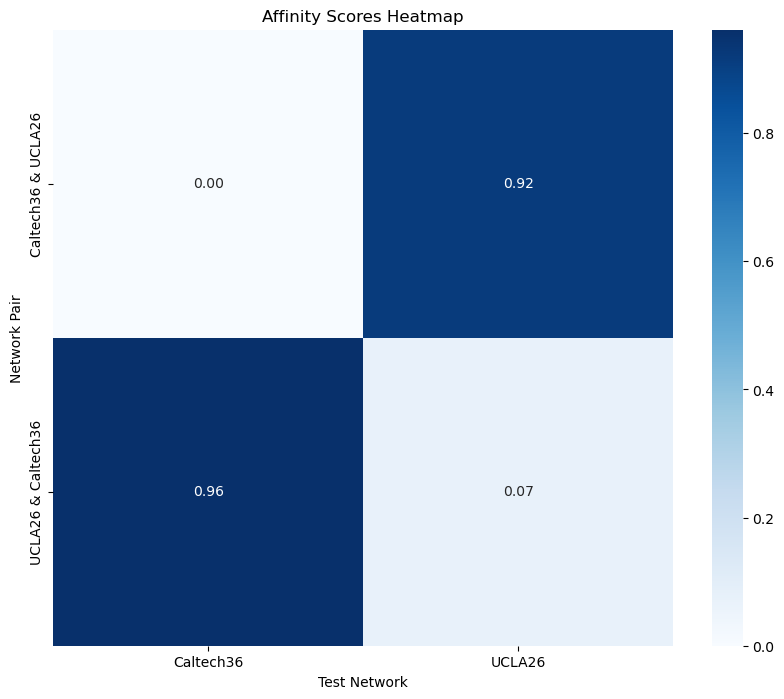

In [5]:
# Example usage 2
ntwk_list = ["Caltech36", "UCLA26"]
sample_size_list = [500, 500]
k = 25
n_components = 16
iterations = 250

affinity_heatmap(ntwk_list, sample_size_list, k, n_components, iterations)